## 1. Read Files From Raw Files (Clinical data, Transcriptomic data, Methylomics data, Metabolomics data)

### 1.1 Clinical Data

In [1]:
import pandas as pd 
phenodata_df = pd.read_excel('./data/pheno_data/LLFS_phenos_21JUN2022.xlsx', sheet_name='Phenodata').sort_values(by='subject')
# Convert the subject column to string
phenodata_df['subject'] = phenodata_df['subject'].astype(str)
display(phenodata_df)

,id,subject,fc,gpedid,sex,age_v1,age_v2,hai_rl_v1,A1Cz_v1,fev1z_lk_v1,...,hdlbeta_invnz_ns,ldlbeta_invnz_ns,logmemdlydtotbetaz_ns,logmemimtotbetaz_ns,mmsetotbeta_invnz_ns,stand5timebeta_invnz_ns,tgbeta_invnz_ns,tmpppfev1betaz_invn_ns,tmpppfev6betaz_invn_ns,weightbeta_invnz_ns
0,13868716.0,8,DK,1026,2,69.0,NaN,-0.583720,-0.320394,-0.740676,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13936547.0,9,DK,1026,2,89.0,NaN,-2.630296,-1.273041,0.791252,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14122493.0,10,DK,1026,2,103.0,NaN,NaN,-0.203962,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19846758.0,27,DK,1031,2,86.0,93.0,0.676691,0.422660,0.545943,...,-0.067650,-1.235955,NaN,NaN,1.831074,NaN,-1.766390,NaN,NaN,-0.369811
4,13702287.0,46,DK,1210,2,92.0,NaN,1.062718,-1.572468,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,25047275.0,32599,BU,23176696,1,61.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4806,25032252.0,32640,NY,99999998,2,57.0,65.0,-1.355774,1.110542,-0.172869,...,0.558426,NaN,NaN,-0.233639,-0.117360,0.338341,NaN,0.009552,0.447331,-1.748481
4807,22630610.0,32643,BU,99999999,2,57.0,65.0,-2.355774,-1.517772,NaN,...,1.154655,0.393440,-0.459828,0.079763,-0.032731,0.250691,-1.901278,-0.355669,-0.336813,-0.343157
4808,29848835.0,32646,BU,99999996,2,49.0,56.0,NaN,0.465043,-2.155477,...,-1.487320,-0.798152,0.577625,NaN,NaN,-0.707892,2.656991,-0.112947,-0.009591,2.716032


In [2]:
### read t2ds label data
import numpy as np
t2ds_label_df = pd.read_table('./data/label_data/t2dpret2d.txt')
t2ds_label_df = t2ds_label_df.replace('.', 0)
t2ds_label_df['pret2ds'] = t2ds_label_df['pret2ds'].astype(np.int64)
t2ds_label_df = t2ds_label_df.sort_values(by='subject')
t2ds_label_df['subject'] = t2ds_label_df['subject'].astype(str)
print(t2ds_label_df.dtypes)
display(t2ds_label_df)

subject    object
t2ds        int64
pret2ds     int64
dtype: object


,subject,t2ds,pret2ds
1,8,0,0
2,9,0,0
6,10,0,0
9,27,0,0
16,46,0,0
...,...,...,...
2445,32637,0,0
4939,32640,0,0
4940,32643,0,0
4937,32646,0,0


### 1.2 Transcriptomic Data

In [3]:
tran_v1_df = pd.read_csv('./data/omics_data/residuals/RNA_seq_residuals_v1_allsubjects.csv').sort_values(by='subject')
display(tran_v1_df)
tran_v1_df_transposed = tran_v1_df.T
# Convert the first row to strings, remove any '.0' at the end, and set it as the new header (column names)
tran_v1_df_transposed.columns = tran_v1_df_transposed.iloc[0].astype(str).str.replace('.0', '', regex=False)
# Drop the first row as it's now the header
tran_v1_df_transposed = tran_v1_df_transposed.drop(tran_v1_df_transposed.index[0])
# Reset the index
tran_v1_df = tran_v1_df_transposed.reset_index()
# Rename the first column to 'subject'
tran_v1_df = tran_v1_df.rename(columns={'index': 'gene_id'})
# Convert the version gene ID to the gene ID
ensembl_gene_ids = tran_v1_df['gene_id'].apply(lambda x: x.split('.')[0]).tolist()
tran_v1_df['gene_id'] = ensembl_gene_ids
display(tran_v1_df)

,subject,ENSG00000000419.14,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.15,ENSG00000001460.18,...,ENSG00000288683.1,ENSG00000288684.1,ENSG00000288700.1,ENSG00000288701.1,ENSG00000288709.1,ENSG00000288710.1,ENSG00000288719.1,ENSG00000288720.1,ENSG00000288722.1,ENSG00000288725.1
275,46,0.012093,0.038230,-0.320381,-0.158254,0.304607,-0.013984,-0.217442,0.116116,0.212697,...,0.888601,0.091351,0.074514,0.088528,-1.304733,-0.017228,-0.058829,0.086124,-0.567470,2.002119
603,47,0.234895,0.059616,0.133187,0.020237,-0.017162,-0.165734,0.159159,0.075438,-0.230485,...,-1.191489,-0.121814,0.165774,-0.021083,-1.613962,-0.017825,-0.054034,-0.024042,0.418420,-0.535940
279,50,-0.070150,-0.323762,0.227800,-0.125382,-0.878681,0.386629,0.130703,-0.109297,-0.071601,...,0.242982,0.258169,-0.385501,-0.011536,2.956053,-0.175542,-0.049831,-0.083002,-0.599076,-0.424030
608,51,0.028753,-0.093181,-0.326355,0.043361,0.059116,0.310254,0.365007,0.055175,0.332732,...,-1.095074,0.155232,0.114625,0.010683,-1.854135,-0.269001,0.155601,-0.236473,-0.075132,0.537381
609,61,-0.005803,-0.123777,0.180213,-0.147767,-0.122985,-0.010501,0.549282,0.088764,0.198238,...,0.786340,-0.079780,0.516323,-0.180390,2.190099,-0.191311,-0.060139,0.118009,0.230734,-0.525412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,31090,-0.274392,-0.088411,0.439949,0.009361,0.072317,-0.436386,-0.160955,0.176106,-0.222130,...,0.593948,-0.799593,-0.092794,-0.022086,-1.231122,0.096351,0.207027,-0.180556,0.498631,-0.380800
591,31094,0.123657,0.237601,-0.072838,0.033511,0.847800,0.038959,-0.133965,-0.018629,-0.298815,...,0.519011,-0.044935,0.137004,0.029262,-0.245608,-0.059848,0.016692,-0.198193,-0.489180,0.081211
592,31112,0.321108,0.048481,-0.360513,0.066066,-0.392555,0.093703,-0.435958,-0.127806,-0.002458,...,0.511920,-0.794905,0.047761,-0.200754,4.130947,-0.055012,0.138313,0.066307,-1.223588,-0.591887
588,31123,0.196291,0.032678,0.310334,0.259842,-0.173647,-0.398508,-0.411581,-0.318573,0.009776,...,1.110727,0.183185,0.063253,0.077179,-1.154199,-0.371513,0.146781,-0.028970,0.682965,1.089997


subject,gene_id,46,47,50,51,61,118,124,140,141,...,31033,31034,31078,31083,31085,31090,31094,31112,31123,31240
0,ENSG00000000419,0.012093,0.234895,-0.070150,0.028753,-0.005803,0.141190,-0.148409,-0.030616,-0.058689,...,-0.208389,-0.065758,-0.027486,0.127509,-0.112513,-0.274392,0.123657,0.321108,0.196291,-0.145684
1,ENSG00000000457,0.038230,0.059616,-0.323762,-0.093181,-0.123777,-0.113322,0.264428,0.199480,0.121542,...,-0.425408,-0.104033,-0.100855,0.097877,0.131630,-0.088411,0.237601,0.048481,0.032678,-0.028332
2,ENSG00000000460,-0.320381,0.133187,0.227800,-0.326355,0.180213,-0.027920,0.170214,-0.204978,0.273006,...,-0.020344,0.374381,-0.069625,0.288172,-0.277580,0.439949,-0.072838,-0.360513,0.310334,0.034743
3,ENSG00000000938,-0.158254,0.020237,-0.125382,0.043361,-0.147767,-0.031781,-0.128769,0.027041,0.047785,...,-0.057116,0.264592,0.094314,0.145456,-0.036837,0.009361,0.033511,0.066066,0.259842,-0.107990
4,ENSG00000000971,0.304607,-0.017162,-0.878681,0.059116,-0.122985,0.471323,0.694277,-0.079578,0.075684,...,0.287675,-0.879596,-0.703371,0.088401,-0.050376,0.072317,0.847800,-0.392555,-0.173647,0.361950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16413,ENSG00000288710,-0.017228,-0.017825,-0.175542,-0.269001,-0.191311,-0.181311,-0.246889,0.174592,-0.013033,...,-0.115425,-0.082066,0.106860,-0.571550,0.130047,0.096351,-0.059848,-0.055012,-0.371513,-0.292954
16414,ENSG00000288719,-0.058829,-0.054034,-0.049831,0.155601,-0.060139,-0.355766,-0.113268,-0.143069,0.077474,...,0.119528,-0.316960,0.157011,-0.048783,0.190413,0.207027,0.016692,0.138313,0.146781,-0.334977
16415,ENSG00000288720,0.086124,-0.024042,-0.083002,-0.236473,0.118009,0.074324,-0.053747,0.027828,-0.046719,...,-0.105959,-0.129669,0.118465,0.381247,-0.010940,-0.180556,-0.198193,0.066307,-0.028970,0.007066
16416,ENSG00000288722,-0.567470,0.418420,-0.599076,-0.075132,0.230734,0.264785,0.557439,-0.301579,-0.646846,...,-0.056263,-0.693543,-0.667040,0.319099,0.257526,0.498631,-0.489180,-1.223588,0.682965,-0.285978


In [4]:
# Keep the gene ID in the ensembl_data dataframe
ensembl_data = pd.read_csv('./data/kg_data/ensembl/mart_export_genename.txt')
ensembl_data= ensembl_data.rename(columns={'Gene stable ID': 'gene_id'}).dropna().drop_duplicates().reset_index(drop=True)
display(ensembl_data)
# Convert the 'Gene Name' column to 'gene_name'
ensembl_data = ensembl_data.rename(columns={'Gene name': 'gene_name'})
merged_tran_v1_df = pd.merge(tran_v1_df, ensembl_data, on='gene_id', how='inner')
# Move the gene name to the first column
merged_tran_v1_df = merged_tran_v1_df[['gene_name'] + [col for col in merged_tran_v1_df.columns if col != 'gene_name']]
# Drop the gene ID column
merged_tran_v1_df = merged_tran_v1_df.drop(columns=['gene_id'])
# Drop duplicated rows and aggregate the rows by grouping them by gene name
merged_tran_v1_df = merged_tran_v1_df.groupby(['gene_name']).mean().reset_index()
display(merged_tran_v1_df)

,gene_id,Gene name
0,ENSG00000210049,MT-TF
1,ENSG00000211459,MT-RNR1
2,ENSG00000210077,MT-TV
3,ENSG00000210082,MT-RNR2
4,ENSG00000209082,MT-TL1
...,...,...
48105,ENSG00000142684,ZNF593
48106,ENSG00000142675,CNKSR1
48107,ENSG00000293494,ZPLD2P
48108,ENSG00000290825,DDX11L2


,gene_name,46,47,50,51,61,118,124,140,141,...,31033,31034,31078,31083,31085,31090,31094,31112,31123,31240
0,5_8S_rRNA,-0.399694,-0.048950,-0.122697,0.202736,0.212299,0.273195,-0.222348,-0.238915,-0.462312,...,-0.280035,-0.183251,0.134936,0.668932,-0.216173,-0.605668,0.351887,-0.047953,-0.263169,0.131194
1,7SK,0.939508,1.403510,0.317910,0.619689,0.572138,0.949543,-2.391483,-0.077341,-0.126945,...,-3.451181,-0.021138,-2.140087,0.347476,1.169753,-1.591763,-2.171323,-2.102949,0.973044,0.150164
2,A1BG,-0.368145,-0.205740,0.167980,0.383563,0.147790,-0.263395,0.291191,0.426879,-0.145996,...,0.486021,0.035688,-0.441156,-0.541505,-0.045798,0.632664,-0.268293,-0.093373,-0.063328,-0.006926
3,A1BG-AS1,0.261314,0.142850,0.598452,0.071688,0.384070,0.096404,0.198271,0.304683,0.268972,...,0.389329,0.163390,0.398426,0.053195,0.197975,-0.026565,0.104797,0.007429,0.398606,0.101037
4,A2M,0.169298,0.169632,-0.283984,0.081207,0.205528,-0.696942,-0.003618,0.198802,-0.059076,...,0.087595,0.182710,0.546999,-0.262409,-0.180501,-0.933036,-0.227889,0.121719,-0.265227,-0.043398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14596,ZXDC,0.067953,0.030565,-0.036975,0.011308,0.044895,0.166434,0.085713,-0.020970,0.062780,...,-0.079792,0.252670,0.060931,-0.153747,0.110476,-0.092846,-0.009470,0.111708,0.030551,-0.001501
14597,ZYG11B,0.051216,-0.381925,0.279469,0.208851,0.148792,-0.042150,-0.032129,-0.362770,0.165745,...,-0.237410,-0.314573,-0.113529,-0.272852,-0.028180,-0.130859,0.307232,-0.022907,0.237815,-0.124834
14598,ZYX,-0.075089,-0.057277,-0.296740,-0.359744,-0.129456,-0.327369,0.039309,-0.057109,-0.212995,...,0.063017,0.006190,-0.009163,0.110229,-0.247497,0.285165,-0.001956,-0.250663,-0.097977,-0.076672
14599,ZZEF1,0.009177,-0.081423,-0.132001,0.030408,0.062183,0.015587,-0.111396,0.038219,-0.003522,...,0.034806,-0.035917,0.104047,0.019178,-0.146924,0.033967,0.010034,0.086737,-0.050959,-0.012706


### 1.3 Methylation Data

In [5]:
core_promoter_df = pd.read_csv('./data/omics_data/epigenomics/Core_Promoter_final.csv').sort_values(by='gene_name').reset_index(drop=True)
core_promoter_sorted_df = core_promoter_df[['gene_name'] + sorted(core_promoter_df.columns[1:], key=lambda x: int(x))] # Sort the dataframe columns (excluding 'gene_name') numerically
distal_promoter_df = pd.read_csv('./data/omics_data/epigenomics/Distal_Promoter_final.csv').sort_values(by='gene_name').reset_index(drop=True)
distal_promoter_sorted_df = distal_promoter_df[['gene_name'] + sorted(distal_promoter_df.columns[1:], key=lambda x: int(x))] # Sort the dataframe columns (excluding 'gene_name') numerically
downstream_df = pd.read_csv('./data/omics_data/epigenomics/Downstream_final.csv').sort_values(by='gene_name').reset_index(drop=True)
downstream_sorted_df = downstream_df[['gene_name'] + sorted(downstream_df.columns[1:], key=lambda x: int(x))] # Sort the dataframe columns (excluding 'gene_name') numerically
proximal_promoter_df = pd.read_csv('./data/omics_data/epigenomics/Proximal_Promoter_final.csv').sort_values(by='gene_name').reset_index(drop=True)
proximal_promoter_sorted_df = proximal_promoter_df[['gene_name'] + sorted(proximal_promoter_df.columns[1:], key=lambda x: int(x))] # Sort the dataframe columns (excluding 'gene_name') numerically
upstream_df = pd.read_csv('./data/omics_data/epigenomics/Upstream_final.csv').sort_values(by='gene_name').reset_index(drop=True)
upstream_sorted_df = upstream_df[['gene_name'] + sorted(upstream_df.columns[1:], key=lambda x: int(x))] # Sort the dataframe columns (excluding 'gene_name') numerically
display(upstream_sorted_df)

,gene_name,102,104,105,106,112,113,115,117,118,...,31001,31002,31003,31004,31010,31011,31013,31014,31015,31018
0,5S_rRNA,0.856111,0.856163,0.810832,0.849601,0.867404,0.886405,0.866072,0.841870,0.866737,...,0.843172,0.813607,0.846139,0.813694,0.843187,0.834767,0.866669,0.846746,0.868848,0.873948
1,5_8S_rRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7SK,0.767616,0.772216,0.778775,0.778671,0.799029,0.787210,0.813128,0.781256,0.764155,...,0.776524,0.769652,0.783073,0.787963,0.773605,0.743426,0.787521,0.802164,0.779943,0.802770
3,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41018,ZZZ3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41019,hsa-mir-1253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41020,hsa-mir-423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41021,hsa-mir-8069-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
# Keep gene names in the ensebmle_data dataframe and drop gene_id
merged_core_promoter_df = pd.merge(core_promoter_sorted_df, ensembl_data, on='gene_name', how='inner').drop(columns=['gene_id'])
merged_core_promoter_df = merged_core_promoter_df.groupby(['gene_name']).mean().reset_index()
merged_distal_promoter_df = pd.merge(distal_promoter_sorted_df, ensembl_data, on='gene_name', how='inner').drop(columns=['gene_id'])
merged_distal_promoter_df = merged_distal_promoter_df.groupby(['gene_name']).mean().reset_index()
merged_downstream_df = pd.merge(downstream_sorted_df, ensembl_data, on='gene_name', how='inner').drop(columns=['gene_id'])
merged_downstream_df = merged_downstream_df.groupby(['gene_name']).mean().reset_index()
merged_proximal_promoter_df = pd.merge(proximal_promoter_sorted_df, ensembl_data, on='gene_name', how='inner').drop(columns=['gene_id'])
merged_proximal_promoter_df = merged_proximal_promoter_df.groupby(['gene_name']).mean().reset_index()
merged_upstream_df = pd.merge(upstream_sorted_df, ensembl_data, on='gene_name', how='inner').drop(columns=['gene_id'])
merged_upstream_df = merged_upstream_df.groupby(['gene_name']).mean().reset_index()
display(merged_upstream_df)

,gene_name,102,104,105,106,112,113,115,117,118,...,31001,31002,31003,31004,31010,31011,31013,31014,31015,31018
0,5S_rRNA,0.856111,0.856163,0.810832,0.849601,0.867404,0.886405,0.866072,0.841870,0.866737,...,0.843172,0.813607,0.846139,0.813694,0.843187,0.834767,0.866669,0.846746,0.868848,0.873948
1,5_8S_rRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,7SK,0.767616,0.772216,0.778775,0.778671,0.799029,0.787210,0.813128,0.781256,0.764155,...,0.776524,0.769652,0.783073,0.787963,0.773605,0.743426,0.787521,0.802164,0.779943,0.802770
3,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41018,ZZZ3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41019,hsa-mir-1253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41020,hsa-mir-423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
41021,hsa-mir-8069-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 2. Gene and Sample Intersection

### 2.1 Gene Intersection Over Omics Data

In [7]:
merged_tran_v1_gene = set(merged_tran_v1_df['gene_name'].tolist())
merged_core_promoter_gene = set(merged_core_promoter_df['gene_name'].tolist())
intersected_gene = sorted(list(merged_tran_v1_gene & merged_core_promoter_gene))
print(intersected_gene)
print('intersected_gene:', len(intersected_gene))

['5_8S_rRNA', '7SK', 'A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A4GALT', 'AAAS', 'AACS', 'AAGAB', 'AAK1', 'AAMP', 'AAR2', 'AARS1', 'AARS2', 'AARSD1', 'AASDH', 'AASDHPPT', 'AASS', 'AATBC', 'AATF', 'AATK', 'ABALON', 'ABAT', 'ABCA1', 'ABCA11P', 'ABCA13', 'ABCA2', 'ABCA3', 'ABCA5', 'ABCA6', 'ABCA7', 'ABCA9', 'ABCB1', 'ABCB10', 'ABCB4', 'ABCB6', 'ABCB7', 'ABCB8', 'ABCB9', 'ABCC1', 'ABCC10', 'ABCC13', 'ABCC2', 'ABCC3', 'ABCC4', 'ABCC5', 'ABCC6', 'ABCD1', 'ABCD2', 'ABCD3', 'ABCD4', 'ABCE1', 'ABCF1', 'ABCF2', 'ABCF2-H2BK1', 'ABCF3', 'ABCG1', 'ABCG2', 'ABHD1', 'ABHD10', 'ABHD11', 'ABHD12', 'ABHD12B', 'ABHD13', 'ABHD14A', 'ABHD14B', 'ABHD15', 'ABHD16A', 'ABHD16B', 'ABHD17A', 'ABHD17AP1', 'ABHD17AP5', 'ABHD17B', 'ABHD17C', 'ABHD18', 'ABHD2', 'ABHD3', 'ABHD4', 'ABHD5', 'ABHD6', 'ABHD8', 'ABI1', 'ABI2', 'ABI3', 'ABITRAM', 'ABL1', 'ABL2', 'ABLIM1', 'ABLIM2', 'ABLIM3', 'ABO', 'ABR', 'ABRACL', 'ABRAXAS1', 'ABRAXAS2', 'ABT1', 'ABTB1', 'ABTB2', 'ABTB3', 'ACAA1', 'ACAA2', 'ACACA', 'ACACB', 'ACAD10', 'ACAD11'

In [8]:
# Keep the gene names that are in both the tran_v1 and core_promoter dataframes
merged_tran_v1_df = merged_tran_v1_df[merged_tran_v1_df['gene_name'].isin(intersected_gene)].reset_index(drop=True)
merged_core_promoter_df = merged_core_promoter_df[merged_core_promoter_df['gene_name'].isin(intersected_gene)].reset_index(drop=True)
merged_distal_promoter_df = merged_distal_promoter_df[merged_distal_promoter_df['gene_name'].isin(intersected_gene)].reset_index(drop=True)
merged_downstream_df = merged_downstream_df[merged_downstream_df['gene_name'].isin(intersected_gene)].reset_index(drop=True)
merged_proximal_promoter_df = merged_proximal_promoter_df[merged_proximal_promoter_df['gene_name'].isin(intersected_gene)].reset_index(drop=True)
merged_upstream_df = merged_upstream_df[merged_upstream_df['gene_name'].isin(intersected_gene)].reset_index(drop=True)
display(merged_tran_v1_df)
display(merged_upstream_df)

,gene_name,46,47,50,51,61,118,124,140,141,...,31033,31034,31078,31083,31085,31090,31094,31112,31123,31240
0,5_8S_rRNA,-0.399694,-0.048950,-0.122697,0.202736,0.212299,0.273195,-0.222348,-0.238915,-0.462312,...,-0.280035,-0.183251,0.134936,0.668932,-0.216173,-0.605668,0.351887,-0.047953,-0.263169,0.131194
1,7SK,0.939508,1.403510,0.317910,0.619689,0.572138,0.949543,-2.391483,-0.077341,-0.126945,...,-3.451181,-0.021138,-2.140087,0.347476,1.169753,-1.591763,-2.171323,-2.102949,0.973044,0.150164
2,A1BG,-0.368145,-0.205740,0.167980,0.383563,0.147790,-0.263395,0.291191,0.426879,-0.145996,...,0.486021,0.035688,-0.441156,-0.541505,-0.045798,0.632664,-0.268293,-0.093373,-0.063328,-0.006926
3,A1BG-AS1,0.261314,0.142850,0.598452,0.071688,0.384070,0.096404,0.198271,0.304683,0.268972,...,0.389329,0.163390,0.398426,0.053195,0.197975,-0.026565,0.104797,0.007429,0.398606,0.101037
4,A2M,0.169298,0.169632,-0.283984,0.081207,0.205528,-0.696942,-0.003618,0.198802,-0.059076,...,0.087595,0.182710,0.546999,-0.262409,-0.180501,-0.933036,-0.227889,0.121719,-0.265227,-0.043398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,ZXDC,0.067953,0.030565,-0.036975,0.011308,0.044895,0.166434,0.085713,-0.020970,0.062780,...,-0.079792,0.252670,0.060931,-0.153747,0.110476,-0.092846,-0.009470,0.111708,0.030551,-0.001501
14594,ZYG11B,0.051216,-0.381925,0.279469,0.208851,0.148792,-0.042150,-0.032129,-0.362770,0.165745,...,-0.237410,-0.314573,-0.113529,-0.272852,-0.028180,-0.130859,0.307232,-0.022907,0.237815,-0.124834
14595,ZYX,-0.075089,-0.057277,-0.296740,-0.359744,-0.129456,-0.327369,0.039309,-0.057109,-0.212995,...,0.063017,0.006190,-0.009163,0.110229,-0.247497,0.285165,-0.001956,-0.250663,-0.097977,-0.076672
14596,ZZEF1,0.009177,-0.081423,-0.132001,0.030408,0.062183,0.015587,-0.111396,0.038219,-0.003522,...,0.034806,-0.035917,0.104047,0.019178,-0.146924,0.033967,0.010034,0.086737,-0.050959,-0.012706


,gene_name,102,104,105,106,112,113,115,117,118,...,31001,31002,31003,31004,31010,31011,31013,31014,31015,31018
0,5_8S_rRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7SK,0.767616,0.772216,0.778775,0.778671,0.799029,0.787210,0.813128,0.781256,0.764155,...,0.776524,0.769652,0.783073,0.787963,0.773605,0.743426,0.787521,0.802164,0.779943,0.802770
2,A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,A1BG-AS1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,A2M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14593,ZXDC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14594,ZYG11B,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14595,ZYX,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14596,ZZEF1,0.765364,0.768909,0.761182,0.750273,0.787182,0.785727,0.769909,0.756909,0.747364,...,0.787364,0.783364,0.733273,0.758909,0.844273,0.741182,0.718455,0.742727,0.741545,0.815455


#### 2.1.1 Regulatory Network

In [9]:
# Add the gene names from databases like [KEGG / BioGRID] to intersect with the common genes
# KEGG
kegg_pathway_df = pd.read_csv('./data/kg_data/KEGG/full_kegg_pathway_list.csv')
kegg_pathway_df = kegg_pathway_df[['source', 'target', 'pathway_name']]
kegg_df = kegg_pathway_df[kegg_pathway_df['pathway_name'].str.contains('signaling pathway|signaling pathways', case=False)]
print(kegg_df['pathway_name'].value_counts())
kegg_df = kegg_df.rename(columns={'source': 'src', 'target': 'dest'})
src_list = list(kegg_df['src'])
dest_list = list(kegg_df['dest'])
path_list = list(kegg_df['pathway_name'])
# Adjust all genes to uppercase
up_src_list = []
for src in src_list:
    up_src = src.upper()
    up_src_list.append(up_src)
up_dest_list = []
for dest in dest_list:
    up_dest = dest.upper()
    up_dest_list.append(up_dest)
up_kegg_conn_dict = {'src': up_src_list, 'dest': up_dest_list}
up_kegg_df = pd.DataFrame(up_kegg_conn_dict)
up_kegg_df = up_kegg_df.drop_duplicates()
up_kegg_df.to_csv('./data/kg_data/KEGG/up_kegg.csv', index=False, header=True)
kegg_gene_list = list(set(list(up_kegg_df['src']) + list(up_kegg_df['dest'])))
print('----- NUMBER OF GENES IN KEGG: ' + str(len(kegg_gene_list)) + ' -----')
print(up_kegg_df.shape)

up_kegg_path_conn_dict = {'src': up_src_list, 'dest': up_dest_list, 'path': path_list}
up_kegg_path_df = pd.DataFrame(up_kegg_path_conn_dict)
up_kegg_path_df = up_kegg_path_df.drop_duplicates()
up_kegg_path_df.to_csv('./data/kg_data/KEGG/up_kegg_path.csv', index=False, header=True)
kegg_path_gene_list = list(set(list(up_kegg_path_df['src']) + list(up_kegg_path_df['dest'])))
print('----- NUMBER OF GENES IN KEGG PATH: ' + str(len(kegg_path_gene_list)) + ' -----')
print(up_kegg_path_df.shape)

pathway_name
PI3K-Akt signaling pathway                                  3992
JAK-STAT signaling pathway                                  3280
Chemokine signaling pathway                                 2766
MAPK signaling pathway                                      2002
cAMP signaling pathway                                      1680
Ras signaling pathway                                       1640
Rap1 signaling pathway                                      1304
Calcium signaling pathway                                   1260
Apelin signaling pathway                                    1011
Wnt signaling pathway                                        935
mTOR signaling pathway                                       836
Hippo signaling pathway                                      830
Insulin signaling pathway                                    721
Glucagon signaling pathway                                   707
Relaxin signaling pathway                                    684
Phospholipas

In [10]:
# BioGRID
biogrid_df = pd.read_table('./data/kg_data/BioGrid/BIOGRID-ALL-3.5.174.mitab.Symbol.txt', delimiter = '\t')
eh_list = list(biogrid_df['e_h'])
et_list = list(biogrid_df['e_t'])
# ADJUST ALL GENES TO UPPERCASE
up_eh_list = []
for eh in eh_list:
    up_eh = eh.upper()
    up_eh_list.append(up_eh)
up_et_list = []
for et in et_list:
    up_et = et.upper()
    up_et_list.append(up_et)
up_biogrid_conn_dict = {'src': up_eh_list, 'dest': up_et_list}
up_biogrid_df = pd.DataFrame(up_biogrid_conn_dict)
print(up_biogrid_df)
print(up_biogrid_df.shape)
up_biogrid_df.to_csv('./data/kg_data/BioGrid/up_biogrid.csv', index = False, header = True)
up_biogrid_gene_list = list(set(list(up_biogrid_df['src']) + list(up_biogrid_df['dest'])))
print('----- NUMBER OF GENES IN BioGRID: ' + str(len(up_biogrid_gene_list)) + ' -----')

           src    dest
0       MAP2K4    FLNC
1         MYPN   ACTN2
2        ACVR1    FNTA
3        GATA2     PML
4         RPA2   STAT3
...        ...     ...
472638   USP18  SAMHD1
472639   USP18    SKP2
472640  SAMHD1   USP18
472641  SAMHD1   CCNA2
472642  SAMHD1    CDK1

[472643 rows x 2 columns]
(472643, 2)
----- NUMBER OF GENES IN BioGRID: 19349 -----


In [11]:
# STRING
string_df = pd.read_csv('./data/kg_data/STRING/9606.protein.links.detailed.v11.0_sym.csv', low_memory=False)
src_list = list(string_df['Source'])
tar_list = list(string_df['Target'])
# ADJUST ALL GENES TO UPPERCASE
up_src_list = []
for src in src_list:
    up_src = src.upper()
    up_src_list.append(up_src)
up_tar_list = []
for tar in tar_list:
    up_tar = tar.upper()
    up_tar_list.append(up_tar)
up_string_conn_dict = {'src': up_src_list, 'dest': up_tar_list}
up_string_df = pd.DataFrame(up_string_conn_dict)
print(up_string_df)
up_string_df.to_csv('./data/kg_data/STRING/up_string.csv', index = False, header = True)
up_string_gene_list = list(set(list(up_string_df['src']) + list(up_string_df['dest'])))
print('----- NUMBER OF GENES IN STRING: ' + str(len(up_string_gene_list)) + ' -----')

          src    dest
0        ARF5  SPTBN2
1        ARF5  KIF13B
2        ARF5   AP1B1
3        ARF5  KIF21A
4        ARF5   TMED7
...       ...     ...
841063  OR6Q1   REEP1
841064  OR6Q1   REEP4
841065  OR6Q1    GNB1
841066  OR6Q1    RTP3
841067  OR6Q1   REEP2

[841068 rows x 2 columns]
----- NUMBER OF GENES IN STRING: 17179 -----


In [12]:
# intersect the [common genes] with the genes in the different databases [KEGG / BioGRID / STRING]
selected_database = 'KEGG'
# selected_database = 'BioGRID'
# selected_database = 'STRING'
intersected_omics_gene_list = list(merged_tran_v1_df['gene_name'])
if selected_database == 'KEGG':
    edge_common_genes = list(set(intersected_omics_gene_list) & set(kegg_gene_list))
elif selected_database == 'BioGRID':
    edge_common_genes = list(set(intersected_omics_gene_list) & set(up_biogrid_gene_list))
elif selected_database == 'STRING':
    edge_common_genes = list(set(intersected_omics_gene_list) & set(up_string_gene_list))

# filter the genes in the different databases [KEGG / BioGRID / STRING] with the [common genes]
if selected_database == 'KEGG':
    filtered_up_kegg_df = up_kegg_df[up_kegg_df['src'].isin(edge_common_genes) & up_kegg_df['dest'].isin(edge_common_genes)]
    src_list = list(filtered_up_kegg_df['src'])
    dest_list = list(filtered_up_kegg_df['dest'])
    all_edge_gene_list = sorted(list(set(src_list + dest_list)))
    print('----- NUMBER OF INTERSECTED GENES IN KEGG: ' + str(len(all_edge_gene_list)) + ' -----')
    filtered_up_kegg_df = filtered_up_kegg_df.drop_duplicates()
    filtered_up_kegg_df = filtered_up_kegg_df.sort_values(by=['src', 'dest']).reset_index(drop=True)
    print('----- NEW KEGG EDGE CONNECTIONS: ' + str(len(filtered_up_kegg_df)) + ' -----')
    filtered_up_kegg_path_df = up_kegg_path_df[up_kegg_path_df['src'].isin(edge_common_genes) & up_kegg_path_df['dest'].isin(edge_common_genes)]
    filtered_up_kegg_path_df = filtered_up_kegg_path_df.drop_duplicates()
    filtered_up_kegg_path_df = filtered_up_kegg_path_df.sort_values(by=['src', 'dest']).reset_index(drop=True)
    print('----- NEW KEGG PATHWAY CONNECTIONS: ' + str(len(filtered_up_kegg_path_df)) + ' -----')

----- NUMBER OF INTERSECTED GENES IN KEGG: 1390 -----
----- NEW KEGG EDGE CONNECTIONS: 9199 -----
----- NEW KEGG PATHWAY CONNECTIONS: 13095 -----


In [13]:
# Filtering the omics genes in the different databases [KEGG / BioGRID / STRING] with the [all_edge_gene_list]
merged_tran_v1_df = merged_tran_v1_df[merged_tran_v1_df['gene_name'].isin(all_edge_gene_list)].reset_index(drop=True)
merged_core_promoter_df = merged_core_promoter_df[merged_core_promoter_df['gene_name'].isin(all_edge_gene_list)].reset_index(drop=True)
merged_distal_promoter_df = merged_distal_promoter_df[merged_distal_promoter_df['gene_name'].isin(all_edge_gene_list)].reset_index(drop=True)
merged_downstream_df = merged_downstream_df[merged_downstream_df['gene_name'].isin(all_edge_gene_list)].reset_index(drop=True)
merged_proximal_promoter_df = merged_proximal_promoter_df[merged_proximal_promoter_df['gene_name'].isin(all_edge_gene_list)].reset_index(drop=True)
merged_upstream_df = merged_upstream_df[merged_upstream_df['gene_name'].isin(all_edge_gene_list)].reset_index(drop=True)
display(merged_tran_v1_df)
display(merged_upstream_df)

,gene_name,46,47,50,51,61,118,124,140,141,...,31033,31034,31078,31083,31085,31090,31094,31112,31123,31240
0,ABL1,-0.022137,-0.237034,0.223209,0.057793,-0.066341,0.045569,-0.289207,0.042666,-0.061024,...,0.101552,-0.093339,-0.154726,-0.259661,-0.008405,0.181731,0.137898,-0.200817,0.065400,-0.217379
1,ABL2,0.214230,-0.013608,0.291218,-0.070347,-0.018638,-0.297029,0.170498,-0.087521,-0.089778,...,-0.170831,-0.366937,-0.119429,0.180286,0.106156,0.466775,0.060544,-0.033285,0.502531,-0.272034
2,ACAA1,-0.177749,-0.062751,-0.453863,-0.150100,-0.029299,0.081568,-0.041679,-0.049954,0.233945,...,-0.046874,-0.006905,0.159199,0.023955,0.122827,0.293089,-0.061451,-0.053541,0.163214,0.121353
3,ACACA,-0.095323,0.087836,-0.067886,0.148037,-0.317211,-0.107004,0.212079,-0.194591,-0.009904,...,0.084013,-0.132097,0.247355,0.207425,0.034975,-0.495902,-0.520919,-0.124165,-0.512551,0.222033
4,ACACB,0.250665,0.181686,-0.769761,0.240904,-0.328558,0.425639,0.125842,0.435764,-0.213625,...,-0.311397,0.217402,-0.405078,-0.187217,0.164635,-0.356997,0.349067,0.143524,0.721514,0.536108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,-0.065815,0.124293,0.070329,0.163721,0.231315,0.437614,-0.257814,-0.114462,0.198376,...,0.393045,-0.385423,-0.274739,-0.377650,0.395227,0.011494,0.162688,-0.008797,0.452815,0.079287
1386,ZFYVE9,0.461394,-0.044510,-0.092078,0.124147,0.439803,0.190978,-0.140051,-0.063390,-0.016001,...,0.247243,-0.200964,0.080729,0.104562,-0.020237,-0.253728,-0.148363,-0.012234,0.247865,-0.091025
1387,ZMAT3,-0.032743,-0.218117,0.097926,-0.089571,0.040048,-0.039668,0.047657,0.183728,-0.020440,...,-0.040218,-0.004877,-0.091852,-0.149481,0.016487,0.077421,0.196364,0.005895,0.115451,0.345785
1388,ZNF274,0.082069,0.229976,-0.073336,-0.258131,-0.014121,-0.040415,0.264087,-0.339554,0.201950,...,0.049674,0.011914,-0.081370,0.120022,0.213983,-0.065446,-0.091361,0.360216,-0.183227,-0.250058


,gene_name,102,104,105,106,112,113,115,117,118,...,31001,31002,31003,31004,31010,31011,31013,31014,31015,31018
0,ABL1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ABL2,0.890494,0.897820,0.870539,0.903023,0.926494,0.927371,0.913506,0.896682,0.921921,...,0.893773,0.899578,0.894802,0.928682,0.895967,0.871955,0.885258,0.907396,0.889511,0.891033
2,ACAA1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ACACA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ACACB,0.860553,0.870322,0.864191,0.864158,0.876966,0.880079,0.876068,0.861876,0.860258,...,0.866204,0.844509,0.866227,0.856396,0.853708,0.844509,0.866152,0.875059,0.862575,0.865946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,0.630571,0.628714,0.573429,0.633000,0.665571,0.711571,0.749000,0.658857,0.661143,...,0.718000,0.597286,0.677429,0.638571,0.594429,0.662857,0.750000,0.653571,0.718286,0.668857
1386,ZFYVE9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1387,ZMAT3,0.889476,0.879365,0.869029,0.878055,0.897590,0.894629,0.899518,0.874052,0.878423,...,0.876270,0.857847,0.886358,0.880645,0.871635,0.841720,0.868606,0.882417,0.880756,0.884567
1388,ZNF274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 2.1.2 Important GWAS Genes

In [15]:
t6_df = pd.read_csv('./data/gwas_data/t6.txt', delimiter = '\t')
t6_genes = t6_df['Locus'].tolist()
gene_names_list = merged_tran_v1_df['gene_name'].tolist()
t6_common_genes = list(set(gene_names_list) & set(t6_genes))
print('t6_common_genes:', len(t6_common_genes))
print(t6_common_genes)

t6_common_genes: 33
['TLE1', 'NF1', 'GNAS', 'ITPR2', 'NOTCH2', 'PIK3R1', 'YWHAH', 'ITGA1', 'MOB1B', 'TRAF3', 'RASGRP1', 'PTEN', 'PPP3CA', 'MAP3K11', 'MAP2K5', 'CDKN1B', 'ETS1', 'CEBPB', 'ACSL1', 'TLE4', 'VEGFA', 'TFRC', 'PTCH1', 'GRB10', 'SCD5', 'IRS1', 'MAP2K7', 'BRAF', 'LPL', 'CCND2', 'CYTH1', 'PDGFC', 'TCF7L2']


### 2.2 Sample Interaction

In [16]:
# Check intersection of subjects between the phenodata and omics data
subject_list = phenodata_df['subject'].tolist()
t2ds_label_subject_list = t2ds_label_df['subject'].tolist()
merged_tran_v1_subject_list = merged_tran_v1_df.columns.tolist()[1:]
merged_upstream_subject_list = merged_upstream_df.columns.tolist()[1:]
intersected_subject_list = sorted(list(set(subject_list) & set(t2ds_label_subject_list) & set(merged_tran_v1_subject_list) & set(merged_upstream_subject_list)))
# Even this is the string, sort the list by numerical order
intersected_subject_list = sorted(intersected_subject_list, key=lambda x: int(x))
print('Number of intersected subjects:', len(intersected_subject_list))

Number of intersected subjects: 813


In [17]:
# Keep the subjects that are in both the phenodata and omics data
phenodata_df = phenodata_df[phenodata_df['subject'].isin(intersected_subject_list)].reset_index(drop=True)
t2ds_label_df = t2ds_label_df[t2ds_label_df['subject'].isin(intersected_subject_list)].reset_index(drop=True)
merged_tran_v1_df = merged_tran_v1_df[['gene_name'] + intersected_subject_list]
merged_core_promoter_df = merged_core_promoter_df[['gene_name'] + intersected_subject_list]
merged_distal_promoter_df = merged_distal_promoter_df[['gene_name'] + intersected_subject_list]
merged_downstream_df = merged_downstream_df[['gene_name'] + intersected_subject_list]
merged_proximal_promoter_df = merged_proximal_promoter_df[['gene_name'] + intersected_subject_list]
merged_upstream_df = merged_upstream_df[['gene_name'] + intersected_subject_list]
display(phenodata_df)
display(t2ds_label_df)
display(merged_tran_v1_df)
display(merged_upstream_df)

,id,subject,fc,gpedid,sex,age_v1,age_v2,hai_rl_v1,A1Cz_v1,fev1z_lk_v1,...,hdlbeta_invnz_ns,ldlbeta_invnz_ns,logmemdlydtotbetaz_ns,logmemimtotbetaz_ns,mmsetotbeta_invnz_ns,stand5timebeta_invnz_ns,tgbeta_invnz_ns,tmpppfev1betaz_invn_ns,tmpppfev6betaz_invn_ns,weightbeta_invnz_ns
0,17122375.0,118,DK,1222,1,62.0,71.0,0.196684,0.430670,-0.174840,...,0.127494,NaN,0.680976,0.594531,0.053094,-1.061874,NaN,0.166968,-0.504621,0.894538
1,18270389.0,124,DK,1222,1,68.0,77.0,1.582711,-1.482520,0.415445,...,-0.431766,-1.408256,0.293560,0.191583,0.755022,NaN,-0.568756,NaN,NaN,-1.581829
2,10536283.0,234,DK,1334,1,86.0,NaN,0.740793,0.293787,-0.076216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10698322.0,236,DK,1334,2,86.0,93.0,-0.323309,0.401316,-0.105740,...,-0.492016,-0.653409,NaN,NaN,-0.287371,-0.998270,-0.014814,-0.212355,-0.465781,-0.007697
4,12167318.0,238,DK,1334,2,48.0,57.0,NaN,-0.167782,-0.269400,...,-0.585568,1.237291,-0.639426,0.023891,1.345779,-0.333369,1.095666,-0.635720,-0.454409,1.103876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,23913627.0,31004,BU,24597479,2,72.0,NaN,1.109294,-0.350653,-0.083725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,29062676.0,31010,BU,24597479,2,78.0,NaN,1.495321,-0.461742,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
810,25563314.0,31011,BU,24597479,1,76.0,NaN,-1.235919,-0.876383,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,20908844.0,31014,BU,24597479,2,67.0,NaN,-0.379062,-0.216841,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,subject,t2ds,pret2ds
0,118,0,0
1,124,0,0
2,234,0,0
3,236,0,0
4,238,0,0
...,...,...,...
808,31004,0,0
809,31010,0,0
810,31011,0,0
811,31014,0,0


,gene_name,118,124,234,236,238,239,240,242,243,...,30866,30901,30998,31001,31003,31004,31010,31011,31014,31015
0,ABL1,0.045569,-0.289207,-0.158553,-0.288357,0.109278,0.078483,-0.190760,0.020950,0.042264,...,0.067281,-0.048735,0.011974,0.010367,0.017865,-0.077208,-0.165029,0.025937,0.445104,-0.207089
1,ABL2,-0.297029,0.170498,-0.101604,0.191166,-0.168715,0.267829,0.044898,-0.038804,-0.377387,...,-0.095969,-0.094112,-0.088583,0.184746,-0.149124,-0.263268,0.076603,-0.098164,-0.090221,0.026903
2,ACAA1,0.081568,-0.041679,0.118627,-0.085628,-0.059947,0.012210,-0.133285,-0.051735,-0.037217,...,-0.046245,0.012721,-0.141169,-0.033366,-0.042529,-0.065391,0.042823,-0.098387,-0.066164,0.167824
3,ACACA,-0.107004,0.212079,0.560545,0.224979,-0.099978,0.086565,0.315660,0.148278,-0.071382,...,-0.217936,0.151979,0.293693,0.405874,-0.380554,0.343101,0.054271,0.195600,-0.566305,-0.040361
4,ACACB,0.425639,0.125842,-0.010969,0.388851,0.143613,-0.000944,-0.364137,0.204372,-0.156980,...,0.292122,0.622587,0.089960,0.003206,-0.200984,0.259279,-0.052328,0.171885,0.078642,-0.714164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,0.437614,-0.257814,0.123944,0.020809,-0.111271,0.069015,0.144254,-0.137835,-0.041021,...,-0.170552,-0.181213,-0.026334,0.148052,-0.398918,-0.297247,-0.127417,-0.092315,0.016463,-0.370063
1386,ZFYVE9,0.190978,-0.140051,-0.218682,0.294628,-0.390006,0.424386,-0.389601,0.541706,0.163744,...,-0.202933,0.604259,-0.198160,-0.059862,0.485937,0.227785,-0.016000,-0.240390,0.170499,0.299275
1387,ZMAT3,-0.039668,0.047657,0.181485,0.012504,0.181664,-0.377753,-0.110290,0.002823,0.077332,...,0.008214,-0.135792,-0.000396,-0.110246,0.352023,0.017770,0.058756,0.296240,-0.001597,-0.216371
1388,ZNF274,-0.040415,0.264087,0.120704,0.100214,-0.067179,-0.149785,0.153048,0.070916,0.010536,...,-0.060890,-0.003758,0.077359,-0.299427,-0.109853,-0.056370,0.308799,0.203357,-0.199736,-0.010621


,gene_name,118,124,234,236,238,239,240,242,243,...,30866,30901,30998,31001,31003,31004,31010,31011,31014,31015
0,ABL1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ABL2,0.921921,0.879270,0.910966,0.839080,0.885057,0.911178,0.915202,0.921607,0.889079,...,0.883341,0.865978,0.855693,0.893773,0.894802,0.928682,0.895967,0.871955,0.907396,0.889511
2,ACAA1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,ACACA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ACACB,0.860258,0.867623,0.892128,0.839515,0.872482,0.872893,0.872684,0.873616,0.855873,...,0.881043,0.844444,0.844263,0.866204,0.866227,0.856396,0.853708,0.844509,0.875059,0.862575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,0.661143,0.683143,0.666000,0.585857,0.725857,0.674143,0.724429,0.692857,0.715429,...,0.645286,0.593571,0.752429,0.718000,0.677429,0.638571,0.594429,0.662857,0.653571,0.718286
1386,ZFYVE9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1387,ZMAT3,0.878423,0.863130,0.889153,0.859345,0.872625,0.870674,0.884303,0.877417,0.855414,...,0.897645,0.852801,0.858202,0.876270,0.886358,0.880645,0.871635,0.841720,0.882417,0.880756
1388,ZNF274,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 2.3 Statistical Analysis on Samples

In [18]:
### filter out different labels
t2ds_df = t2ds_label_df[t2ds_label_df['t2ds'] == 1]['subject']
pret2ds_df = t2ds_label_df[t2ds_label_df['pret2ds'] == 1]['subject']
no_t2ds_df = t2ds_label_df[(t2ds_label_df['t2ds'] != 1 ) & (t2ds_label_df['pret2ds'] != 1)]['subject']
# check the intersection
# t2ds
t2ds_list = list(t2ds_df) 
t2ds_set = set(t2ds_list)
# pret2ds
pret2ds_list = list(pret2ds_df)
pret2ds_set = set(pret2ds_list)
# no_t2ds
no_t2ds_list = list(no_t2ds_df)
no_t2ds_set = set(no_t2ds_list)
# [t2ds / pret2ds]
t2ds_pret2ds_intersection = t2ds_set.intersection(pret2ds_set)
if t2ds_pret2ds_intersection==set(): print('No intersections of t2ds and pret2ds')
# [t2ds / no_t2ds]
t2ds_no_t2ds_intersection = t2ds_set.intersection(no_t2ds_set)
if t2ds_no_t2ds_intersection==set(): print('No intersections of t2ds and no_t2ds')
# [pret2ds / no_t2ds]
pret2ds_no_t2ds_intersection = pret2ds_set.intersection(no_t2ds_set)
if pret2ds_no_t2ds_intersection==set(): print('No intersections of pret2ds and no_t2ds')

No intersections of t2ds and pret2ds
No intersections of t2ds and no_t2ds
No intersections of pret2ds and no_t2ds


#### 2.3.1 Cleaning clinical data

In [19]:
### cleaning clinical data [phenodata_df]
# intersections between label and clinical data
label_phenodata_df = phenodata_df.merge(t2ds_label_df, left_on='subject', right_on='subject', how='inner')
label_phenodata_df = label_phenodata_df.drop(columns=['t2ds', 'pret2ds'])
label_phenodata_df = label_phenodata_df.dropna(subset=['id'])
# check v1 features, v2 features and their intersections 
label_phenodata_df_col_name_list = list(label_phenodata_df.columns)
print(len(label_phenodata_df_col_name_list))
print(label_phenodata_df_col_name_list)
# v1 features
label_phenodata_df_v1_col_name_list = [col for col in label_phenodata_df_col_name_list if '_v1' in col]
print('--- Number of v1: ', len(label_phenodata_df_v1_col_name_list))
label_phenodata_df_v1_col_realname_list = [name.removesuffix('_v1') for name in label_phenodata_df_v1_col_name_list]
print(label_phenodata_df_v1_col_realname_list)
# v2 features
label_phenodata_df_v2_col_name_list = [col for col in label_phenodata_df_col_name_list if '_v2' in col]
print('--- Number of v2: ', len(label_phenodata_df_v2_col_name_list))
label_phenodata_df_v2_col_realname_list = [name.removesuffix('_v2') for name in label_phenodata_df_v2_col_name_list]
print(label_phenodata_df_v2_col_realname_list)
# gc [growth curve model] features
label_phenodata_df_gc_col_name_list = [col for col in label_phenodata_df_col_name_list if '_gc' in col]
print('--- Number of gc: ', len(label_phenodata_df_gc_col_name_list))
label_phenodata_df_gc_col_realname_list = [name.removesuffix('_gc') for name in label_phenodata_df_gc_col_name_list]
print(label_phenodata_df_gc_col_realname_list)
# ns [naive slope (simple regression)] features
label_phenodata_df_ns_col_name_list = [col for col in label_phenodata_df_col_name_list if '_ns' in col]
print('--- Number of ns: ', len(label_phenodata_df_ns_col_name_list))
label_phenodata_df_ns_col_realname_list = [name.removesuffix('_ns') for name in label_phenodata_df_ns_col_name_list]
print(label_phenodata_df_ns_col_realname_list)
# Not known class features
v1_v2_gc_ns_list = label_phenodata_df_v1_col_name_list + label_phenodata_df_v2_col_name_list +\
                         label_phenodata_df_gc_col_name_list + label_phenodata_df_ns_col_name_list
not_known_col_name_list = [name for name in label_phenodata_df_col_name_list if name not in v1_v2_gc_ns_list]
print('--- Number of not known features: ', len(not_known_col_name_list))
print(not_known_col_name_list)
# [v1 / v2] intersection
v1_v2_intersection_set = set(label_phenodata_df_v1_col_realname_list).intersection(set(label_phenodata_df_v2_col_realname_list))
print('--- Number of intersected features of v1 & v2: ', len(v1_v2_intersection_set))
print(v1_v2_intersection_set)

# reserve only first visit columns [v1]
label_phenodata_df_id_v1_col_name_list = not_known_col_name_list + label_phenodata_df_v1_col_name_list
redundant_feat_list = ['teststrnz_invn_v1', 'srage_logz_invn_v1', 'il6_logz_invn_v1', 'tg_logz_v1', 'ldlz_v1', 'igf1_invnz_v1', 'hdlz_v1', 'hba1cz_v1', 'glucz_v1', 'dhea_logz_v1', '_ins_logz_v1', 'A1Cz_v1']
label_phenodata_df_id_v1_col_name_list = [item for item in label_phenodata_df_id_v1_col_name_list if item not in redundant_feat_list]
print(label_phenodata_df_id_v1_col_name_list)
v1_label_phenodata_df = label_phenodata_df[label_phenodata_df_id_v1_col_name_list]
# # check v1 are all float types
# pd.set_option('display.max_rows', 120)
# print(v1_label_phenodata_df.dtypes)

# data imputation by replacing nan values
v1_label_phenodata_nan_col_list = v1_label_phenodata_df.columns[v1_label_phenodata_df.isna().any()].tolist()
for nan_col_name in v1_label_phenodata_nan_col_list:
    v1_label_phenodata_df[nan_col_name] = v1_label_phenodata_df[nan_col_name].fillna(v1_label_phenodata_df[nan_col_name].mean())

# check if there are any NaN values in the DataFrame
if v1_label_phenodata_df.isnull().values.any():
    print('\n--- DataFrame contains NaN values ---\n')
else:
    print('\n--- DataFrame does not contain NaN values ---\n')


165
['id', 'subject', 'fc', 'gpedid', 'sex', 'age_v1', 'age_v2', 'hai_rl_v1', 'A1Cz_v1', 'fev1z_lk_v1', 'inor_Tsadj_res_v1', 'prin1z_v2', 'q_plaque_v2', 'nlogplaque_sevq_v2', 'TSadj_BP_bcz_v1', '_BMI_logz_v1', '_Pulsez_v1', '_Waistz_v1', '_dbp2z_v1', '_ins_logz_v1', '_sbp2z_v1', 'albz_v1', 'animaltotz_v1', 'cholz_v1', 'd2_logz_v1', 'd3z_v1', 'dhea_logz_v1', 'digitbwdtotz_v1', 'digitfwdtotz_v1', 'digitsymtotz_v1', 'fev1z_v1', 'fev1fvc_bcz_v1', 'fev6z_v1', 'gaitspeedz_v1', 'glucz_v1', 'hba1cz_v1', 'hdlz_v1', 'hscrp_logz_v1', 'igf1_invnz_v1', 'ldlz_v1', 'logmemdlydtotz_v1', 'logmemimtotz_v1', 'mmsetot_bcz_v1', 'ntbnpe_logz_v1', 'pp2z_v1', 'stand5time_invnz_v1', 'tg_logz_v1', 'tmpPPFEV1z_v1', 'tmpPPFEV6z_v1', 'transferrin_invnz_v1', 'weightz_v1', '_totscorez_invn_v1', 'creatr_bcz_invn_v1', 'cysc_logz_invn_v1', 'fvcz_invn_v1', 'gripz_invn_v1', 'il6_logz_invn_v1', 'srage_logz_invn_v1', 'teststrnz_invn_v1', 'ADAVGz_v2', 'ALDz_v2', 'PBI_logz_v2', 'PFSMz_v2', 'PFSP_logz_v2', '_BMI_logz_v2', '_P

C:\Users\hemingzhang\AppData\Local\Temp\ipykernel_35716\1609530299.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1_label_phenodata_df[nan_col_name] = v1_label_phenodata_df[nan_col_name].fillna(v1_label_phenodata_df[nan_col_name].mean())


In [20]:
# Check unique value
pd.set_option('display.max_rows', 10)
display(v1_label_phenodata_df)
print(v1_label_phenodata_df.shape)
print(v1_label_phenodata_df.nunique())

,id,subject,fc,gpedid,sex,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,...,tmpPPFEV6z_v1,transferrin_invnz_v1,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1
0,17122375.0,118,DK,1222,1,62.0,0.196684,-0.174840,1.301073,-1.249937,...,-0.724434,1.569941,0.672278,-0.566943,1.765985,0.211970,-0.709229,-0.808088,-0.029385,-0.482012
1,18270389.0,124,DK,1222,1,68.0,1.582711,0.415445,0.959648,-0.883484,...,0.194664,1.548354,1.055116,0.777004,-1.229517,0.218004,1.074278,1.336038,-0.029385,1.240505
2,10536283.0,234,DK,1334,1,86.0,0.740793,-0.076216,0.037238,0.076562,...,-0.474505,-0.710712,-0.416688,-0.923783,0.300901,0.015278,-0.639767,0.541525,-0.029385,-0.338051
3,10698322.0,236,DK,1334,2,86.0,-0.323309,-0.105740,1.163992,-1.119362,...,-0.339177,-0.163780,-0.365382,2.107226,0.366984,-0.863692,-0.147022,0.348508,-0.029385,-0.122128
4,12167318.0,238,DK,1334,2,48.0,0.059856,-0.269400,-0.762713,0.843561,...,-0.533737,0.689104,0.872437,0.220589,2.559119,-1.081329,-0.628722,-0.257626,-0.029385,-0.597425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,23913627.0,31004,BU,24597479,2,72.0,1.109294,-0.083725,1.515900,-1.682905,...,-0.182051,0.817651,1.132759,0.441731,-0.677972,0.626428,-0.033596,1.480515,0.809948,0.889124
809,29062676.0,31010,BU,24597479,2,78.0,1.495321,-0.038309,0.500530,-0.561930,...,-0.019157,1.341618,2.170785,1.141017,0.463065,0.622519,-1.086421,0.266607,-0.029385,0.157456
810,25563314.0,31011,BU,24597479,1,76.0,-1.235919,-0.038309,2.979447,-3.144342,...,-0.019157,0.404463,0.240379,-0.925824,-0.091993,-0.686950,2.045356,0.472148,1.278690,1.551555
811,20908844.0,31014,BU,24597479,2,67.0,-0.379062,-0.038309,2.187931,-2.504050,...,-0.019157,0.964404,3.023267,-0.394663,-0.111858,0.455044,0.091864,0.392730,-0.869379,0.665608


(813, 45)
id                     813
subject                813
fc                       4
gpedid                  93
sex                      2
                      ... 
cysc_logz_invn_v1      774
fvcz_invn_v1           744
gripz_invn_v1          744
abi_bcz_invn_v1        334
armspan_bcz_invn_v1    663
Length: 45, dtype: int64


#### 2.3.2 Statistical analysis for clinical features

In [21]:
### Stat analysis for clinical features
# [423 t2ds] in clinical dataframe
t2ds_phenodata_df = v1_label_phenodata_df[v1_label_phenodata_df['subject'].isin(t2ds_list)].reset_index(drop=True)
display(t2ds_phenodata_df)
# [588 pret2ds] in clinical dataframe
pret2ds_phenodata_df = v1_label_phenodata_df[v1_label_phenodata_df['subject'].isin(pret2ds_list)].reset_index(drop=True)
display(pret2ds_phenodata_df)
# [3788 no_t2ds] in clinical dataframe
no_t2ds_phenodata_df = v1_label_phenodata_df[v1_label_phenodata_df['subject'].isin(no_t2ds_list)].reset_index(drop=True)
display(no_t2ds_phenodata_df)

from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu
p_value_ks_t2ds_pret2ds_list = []
p_value_ks_t2ds_no_t2ds_list = []
p_value_ks_pret2ds_no_t2ds_list = []
# label_phenodata_df_rvid_v1_col_name_list = label_phenodata_df_id_v1_col_name_list[4:]
label_phenodata_df_rvid_v1_col_name_list = label_phenodata_df_id_v1_col_name_list[5:] # remove sex feature
print(label_phenodata_df_id_v1_col_name_list)
print(label_phenodata_df_rvid_v1_col_name_list)
for col_name in label_phenodata_df_rvid_v1_col_name_list:
    t2ds_feature_list = list(t2ds_phenodata_df[col_name])
    pret2ds_feature_list = list(pret2ds_phenodata_df[col_name])
    no_t2ds_feature_list = list(no_t2ds_phenodata_df[col_name])
    # if col_name == 'sex':
    #     # [t2ds / pret2ds]
    #     _, p_value_mw_t2ds_pret2ds = mannwhitneyu(t2ds_feature_list, pret2ds_feature_list)
    #     p_value_ks_t2ds_pret2ds_list.append(p_value_mw_t2ds_pret2ds)
    #     print('[t2ds/ pret2ds] Mann-Whitney U test p-value: ', p_value_ks_t2ds_pret2ds)
    #     # [t2ds / no_t2ds]
    #     _, p_value_mw_t2ds_no_t2ds = mannwhitneyu(t2ds_feature_list, no_t2ds_feature_list)
    #     p_value_ks_t2ds_no_t2ds_list.append(p_value_mw_t2ds_no_t2ds)
    #     print('[t2ds/ no_t2ds] Mann-Whitney U test p-value: ', p_value_ks_t2ds_no_t2ds)
    #     # [pret2ds / no_t2ds]
    #     _, p_value_mw_pret2ds_no_t2ds = mannwhitneyu(pret2ds_feature_list, no_t2ds_feature_list)
    #     p_value_ks_pret2ds_no_t2ds_list.append(p_value_mw_pret2ds_no_t2ds)
    #     print('[pret2ds/ no_t2ds] Mann-Whitney U test p-value: ', p_value_ks_pret2ds_no_t2ds)

    # else:
    # [t2ds/ pret2ds]
    ks_stat_t2ds_pret2ds, p_value_ks_t2ds_pret2ds = ks_2samp(t2ds_feature_list, pret2ds_feature_list)
    p_value_ks_t2ds_pret2ds_list.append(p_value_ks_t2ds_pret2ds)
    # print('[t2ds/ pret2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_pret2ds)
    # [t2ds/ no_t2ds]
    ks_stat_t2ds_no_t2ds, p_value_ks_t2ds_no_t2ds = ks_2samp(t2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_t2ds_no_t2ds_list.append(p_value_ks_t2ds_no_t2ds)
    # print('[t2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_no_t2ds)
    # [pret2ds/ no_t2ds]
    ks_stat_pret2ds_no_t2ds, p_value_ks_pret2ds_no_t2ds = ks_2samp(pret2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_pret2ds_no_t2ds_list.append(p_value_ks_pret2ds_no_t2ds)
    # print('[pret2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_pret2ds_no_t2ds)

print(len(label_phenodata_df_rvid_v1_col_name_list))
print(len(p_value_ks_t2ds_pret2ds_list))
print(len(p_value_ks_t2ds_no_t2ds_list))
print(len(p_value_ks_pret2ds_no_t2ds_list))

label_phenodata_rvid_v1_col_name_pvalue_df = pd.DataFrame({
    'features': label_phenodata_df_rvid_v1_col_name_list,
    't2ds_pret2ds_pvalue': p_value_ks_t2ds_pret2ds_list,
    't2ds_no_t2ds_pvalue': p_value_ks_t2ds_no_t2ds_list,
    'pret2ds_no_t2ds_pvalue': p_value_ks_pret2ds_no_t2ds_list
})
import os
if os.path.exists('./data/stat_data/') == False:
    os.mkdir('./data/stat_data/')
label_phenodata_rvid_v1_col_name_pvalue_df.to_csv('./data/stat_data/label_phenodata_rvid_v1_col_name_pvalue.csv', index=False, header=True)

,id,subject,fc,gpedid,sex,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,...,tmpPPFEV6z_v1,transferrin_invnz_v1,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1
0,18302654.0,281,DK,1409,2,58.0,2.541897,-1.400428,1.378022,-1.370886,...,-0.501984,0.107159,0.476184,0.102398,0.008011,-0.423460,-0.157302,-0.178171,-0.029385,-0.242003
1,14919369.0,1084,DK,3494,2,90.0,0.059856,-0.038309,0.065218,-0.067712,...,-0.019157,-0.019577,1.076277,1.790783,-1.659570,1.155461,0.012958,0.444691,-0.029385,0.267362
2,13660840.0,1276,DK,3890,1,75.0,0.059856,-0.038309,0.244946,-0.338776,...,-0.019157,-1.400125,-0.744280,-0.439677,0.518191,0.892859,0.012958,-0.428204,-0.029385,-0.164295
3,19128792.0,1434,DK,3933,2,67.0,0.059856,0.472382,-0.041878,-0.047162,...,-0.040526,-2.050228,1.068587,-0.380888,-0.074575,0.585846,0.401461,-0.299453,-0.029385,-0.189857
4,17557035.0,1451,DK,4310,2,70.0,1.313951,0.030909,0.511737,-0.590533,...,0.831816,-0.525822,-1.381651,1.024316,-0.452982,0.317212,0.395960,-0.114372,-0.029385,-0.965545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,40226466.0,25774,NY,41124017,1,94.0,1.922162,-1.344351,0.000776,-0.054553,...,-1.034535,0.281683,-0.167760,0.707571,-0.304815,0.027073,-0.462199,0.990993,-0.704923,0.327348
64,41124017.0,25776,NY,41124017,1,95.0,3.819833,0.221757,-1.015225,0.863911,...,1.174431,-1.387069,-0.153174,-0.853075,-1.565542,1.365169,0.654383,0.753864,0.313642,1.214433
65,29553931.0,30325,BU,26497388,2,64.0,1.927924,-0.813878,-0.907622,0.990772,...,-1.025285,2.002460,2.706686,-0.489499,1.010609,0.934356,-1.279501,-0.811372,2.916709,0.332208
66,25987520.0,30862,BU,28157972,2,78.0,2.495321,-0.796590,1.228881,-1.094655,...,-0.820881,-2.430434,-1.303774,0.443786,-0.291971,-0.083450,-0.806286,-1.923695,-0.915149,-1.616074


,id,subject,fc,gpedid,sex,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,...,tmpPPFEV6z_v1,transferrin_invnz_v1,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1
0,13938212.0,240,DK,1334,2,61.0,0.059856,-0.024068,-0.537865,0.529897,...,-0.064742,-1.403256,0.399637,0.376599,-0.241328,0.287193,0.196296,1.578730,-0.029385,0.154350
1,16059495.0,249,DK,1334,1,57.0,0.059856,2.102168,-1.312254,1.173144,...,1.418737,0.629928,-0.083335,-0.029019,-0.431484,0.293623,1.087440,-0.268787,-0.029385,-0.661783
2,17925505.0,253,DK,1334,1,56.0,0.810657,-0.059224,-0.295287,0.382381,...,-0.658044,-0.654653,0.676245,-0.066331,0.292529,0.035117,-0.816486,0.800457,-0.029385,-0.876438
3,19318278.0,258,DK,1334,1,70.0,1.378053,1.911514,1.182130,-1.130984,...,1.657636,1.090551,0.315660,0.911619,-1.193906,-1.201620,0.708503,1.743488,-0.029385,-0.768816
4,14598610.0,1017,DK,3357,1,83.0,-0.952221,-1.546390,0.792450,-0.699675,...,-1.802807,0.387237,0.099519,-0.335471,-0.258687,0.506189,-1.293709,-0.719372,-0.029385,0.045739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,48670434.0,25784,NY,41124017,2,61.0,0.234911,0.323150,0.260418,-0.202239,...,0.272312,-0.167405,-0.853671,-1.283005,0.107828,0.546207,-0.381349,-1.033121,0.051649,-0.672902
100,22816987.0,30369,BU,27141019,1,55.0,0.059856,0.467083,-1.035949,1.059078,...,-0.060203,0.776296,0.335037,-0.831066,1.126892,-0.647438,1.157387,0.432531,0.145937,1.278488
101,28497063.0,30574,BU,29651361,1,38.0,0.059856,-0.038309,0.065218,-0.067712,...,0.024754,1.431838,0.405670,0.974316,-1.461505,0.887283,-1.373357,-1.688480,0.868230,-0.609944
102,22150502.0,30863,BU,28157972,2,88.0,0.059856,-0.038309,-0.811729,0.747201,...,-0.019157,0.744311,3.150576,-2.987335,1.276348,-0.970636,0.012958,-1.252218,-1.852807,1.194155


,id,subject,fc,gpedid,sex,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,...,tmpPPFEV6z_v1,transferrin_invnz_v1,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1
0,17122375.0,118,DK,1222,1,62.0,0.196684,-0.174840,1.301073,-1.249937,...,-0.724434,1.569941,0.672278,-0.566943,1.765985,0.211970,-0.709229,-0.808088,-0.029385,-0.482012
1,18270389.0,124,DK,1222,1,68.0,1.582711,0.415445,0.959648,-0.883484,...,0.194664,1.548354,1.055116,0.777004,-1.229517,0.218004,1.074278,1.336038,-0.029385,1.240505
2,10536283.0,234,DK,1334,1,86.0,0.740793,-0.076216,0.037238,0.076562,...,-0.474505,-0.710712,-0.416688,-0.923783,0.300901,0.015278,-0.639767,0.541525,-0.029385,-0.338051
3,10698322.0,236,DK,1334,2,86.0,-0.323309,-0.105740,1.163992,-1.119362,...,-0.339177,-0.163780,-0.365382,2.107226,0.366984,-0.863692,-0.147022,0.348508,-0.029385,-0.122128
4,12167318.0,238,DK,1334,2,48.0,0.059856,-0.269400,-0.762713,0.843561,...,-0.533737,0.689104,0.872437,0.220589,2.559119,-1.081329,-0.628722,-0.257626,-0.029385,-0.597425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,23913627.0,31004,BU,24597479,2,72.0,1.109294,-0.083725,1.515900,-1.682905,...,-0.182051,0.817651,1.132759,0.441731,-0.677972,0.626428,-0.033596,1.480515,0.809948,0.889124
637,29062676.0,31010,BU,24597479,2,78.0,1.495321,-0.038309,0.500530,-0.561930,...,-0.019157,1.341618,2.170785,1.141017,0.463065,0.622519,-1.086421,0.266607,-0.029385,0.157456
638,25563314.0,31011,BU,24597479,1,76.0,-1.235919,-0.038309,2.979447,-3.144342,...,-0.019157,0.404463,0.240379,-0.925824,-0.091993,-0.686950,2.045356,0.472148,1.278690,1.551555
639,20908844.0,31014,BU,24597479,2,67.0,-0.379062,-0.038309,2.187931,-2.504050,...,-0.019157,0.964404,3.023267,-0.394663,-0.111858,0.455044,0.091864,0.392730,-0.869379,0.665608


['id', 'subject', 'fc', 'gpedid', 'sex', 'age_v1', 'hai_rl_v1', 'fev1z_lk_v1', 'inor_Tsadj_res_v1', 'TSadj_BP_bcz_v1', '_BMI_logz_v1', '_Pulsez_v1', '_Waistz_v1', '_dbp2z_v1', '_sbp2z_v1', 'albz_v1', 'animaltotz_v1', 'cholz_v1', 'd2_logz_v1', 'd3z_v1', 'digitbwdtotz_v1', 'digitfwdtotz_v1', 'digitsymtotz_v1', 'fev1z_v1', 'fev1fvc_bcz_v1', 'fev6z_v1', 'gaitspeedz_v1', 'hscrp_logz_v1', 'logmemdlydtotz_v1', 'logmemimtotz_v1', 'mmsetot_bcz_v1', 'ntbnpe_logz_v1', 'pp2z_v1', 'stand5time_invnz_v1', 'tmpPPFEV1z_v1', 'tmpPPFEV6z_v1', 'transferrin_invnz_v1', 'weightz_v1', '_totscorez_invn_v1', 'creatr_bcz_invn_v1', 'cysc_logz_invn_v1', 'fvcz_invn_v1', 'gripz_invn_v1', 'abi_bcz_invn_v1', 'armspan_bcz_invn_v1']
['age_v1', 'hai_rl_v1', 'fev1z_lk_v1', 'inor_Tsadj_res_v1', 'TSadj_BP_bcz_v1', '_BMI_logz_v1', '_Pulsez_v1', '_Waistz_v1', '_dbp2z_v1', '_sbp2z_v1', 'albz_v1', 'animaltotz_v1', 'cholz_v1', 'd2_logz_v1', 'd3z_v1', 'digitbwdtotz_v1', 'digitfwdtotz_v1', 'digitsymtotz_v1', 'fev1z_v1', 'fev1fvc_b

In [22]:
label_phenodata_df_rvid_v1_continous_name_list = label_phenodata_df_id_v1_col_name_list[5:] # remove [sex]
t2ds_phenodata_average_list = t2ds_phenodata_df[label_phenodata_df_rvid_v1_continous_name_list].mean().tolist()
pret2ds_phenodata_average_list = pret2ds_phenodata_df[label_phenodata_df_rvid_v1_continous_name_list].mean().tolist()
no_t2ds_phenodata_average_list = no_t2ds_phenodata_df[label_phenodata_df_rvid_v1_continous_name_list].mean().tolist()

In [23]:
print(p_value_ks_pret2ds_no_t2ds_list)
print(len(p_value_ks_pret2ds_no_t2ds_list))
print(label_phenodata_df_rvid_v1_continous_name_list)
print(len(label_phenodata_df_rvid_v1_continous_name_list))

[0.008823470549872077, 0.009737440638521498, 0.19060729518638267, 0.08112892914423772, 0.08013851496572587, 5.5349698489102946e-18, 0.007893642524185271, 1.5557629214640995e-13, 0.017253519693329795, 0.014154896917032407, 0.7473548220442532, 0.4166318888978165, 0.26039948094303533, 0.7492713860338388, 0.000659915195398703, 0.7661569432113696, 0.3491742411766938, 0.7064591793423308, 0.15212394110451488, 0.1258466600538383, 0.007753897733421593, 0.6133353985872679, 8.626115360516931e-07, 0.9099350401335436, 0.6288283821353785, 0.09658269427434903, 0.0005638518935725284, 0.12248129472346347, 0.41902477993476483, 0.1958584696416688, 0.00612199683959471, 0.036425881309595225, 6.486890557031635e-12, 0.19579916586475493, 0.26125207794228694, 0.06702852451718559, 0.007893377584105854, 0.10880696166952529, 0.6026637618706466, 0.06802269889759803]
40
['age_v1', 'hai_rl_v1', 'fev1z_lk_v1', 'inor_Tsadj_res_v1', 'TSadj_BP_bcz_v1', '_BMI_logz_v1', '_Pulsez_v1', '_Waistz_v1', '_dbp2z_v1', '_sbp2z_v1'

40


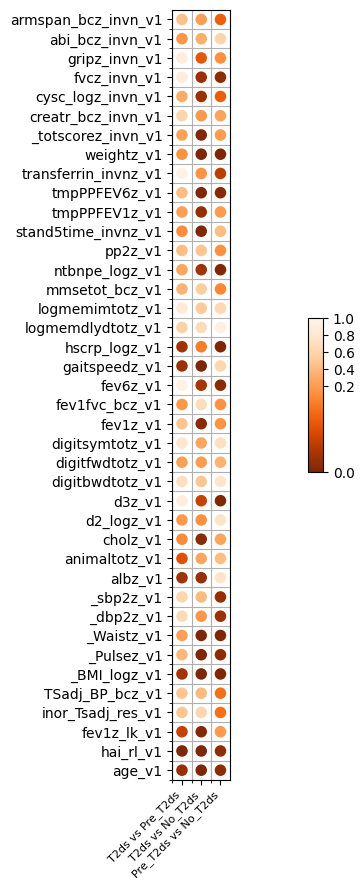

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.colors import TwoSlopeNorm
import pandas as pd

cmap = 'Oranges_r'
# cmap = 'Oranges'
list1 = p_value_ks_t2ds_pret2ds_list
list2 = p_value_ks_t2ds_no_t2ds_list
list3 = p_value_ks_pret2ds_no_t2ds_list

#retrieve unique labels
ylabels = label_phenodata_df_rvid_v1_continous_name_list
print(len(ylabels))
xlabels = ['T2ds vs Pre_T2ds', 'T2ds vs No_T2ds', 'Pre_T2ds vs No_T2ds']
ylabels_num_list = list(np.arange(0, len(ylabels))) + list(np.arange(0, len(ylabels))) + list(np.arange(0, len(ylabels)))
xlabels_num_list = len(ylabels) * [0] + len(ylabels) * [1] + len(ylabels) * [2]
xn = len(xlabels)
yn = len(ylabels)
#retrieve size and color information    
s = np.array(list1 + list2 + list3)
c = np.array(list1 + list2 + list3)

#preparation of the figure with its grid
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(-0.5, xn-0.5)
ax.set_ylim(-0.5, yn-0.5)
ax.set(xticks=np.arange(xn), yticks=np.arange(yn),
       xticklabels=xlabels, yticklabels=ylabels)

ax.set_xticks(np.arange(xn)-0.5, minor=True)
ax.set_yticks(np.arange(yn)-0.5, minor=True)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)
# plt.xticks(rotation=90)
ax.grid(which='minor')
#ensure circles are displayed as circles
ax.set_aspect("equal", "box")

#create circles patches and colorbar
# R = 0.4 - s/s.max()/2
R = [0.3] * len(s)
# R = 0.3-s/(s.max()/0.3)
circles = [plt.Circle((xlabels_num_list[i], ylabels_num_list[i]), radius=r) for i, r in enumerate(R)]
norm = TwoSlopeNorm(vmin=0, vmax=1, vcenter=0.1)
col = PatchCollection(circles, array=c, cmap=cmap, norm=norm)
ax.add_collection(col)
fig.colorbar(col, shrink=0.2, aspect=10)

In [25]:
bar_label_phenodata_df_rvid_v1_continous_name_list = label_phenodata_df_id_v1_col_name_list[6:] # remove [sex, age]
bar_t2ds_phenodata_average_list = t2ds_phenodata_df[bar_label_phenodata_df_rvid_v1_continous_name_list].mean().tolist()
bar_pret2ds_phenodata_average_list = pret2ds_phenodata_df[bar_label_phenodata_df_rvid_v1_continous_name_list].mean().tolist()
bar_no_t2ds_phenodata_average_list = no_t2ds_phenodata_df[bar_label_phenodata_df_rvid_v1_continous_name_list].mean().tolist()

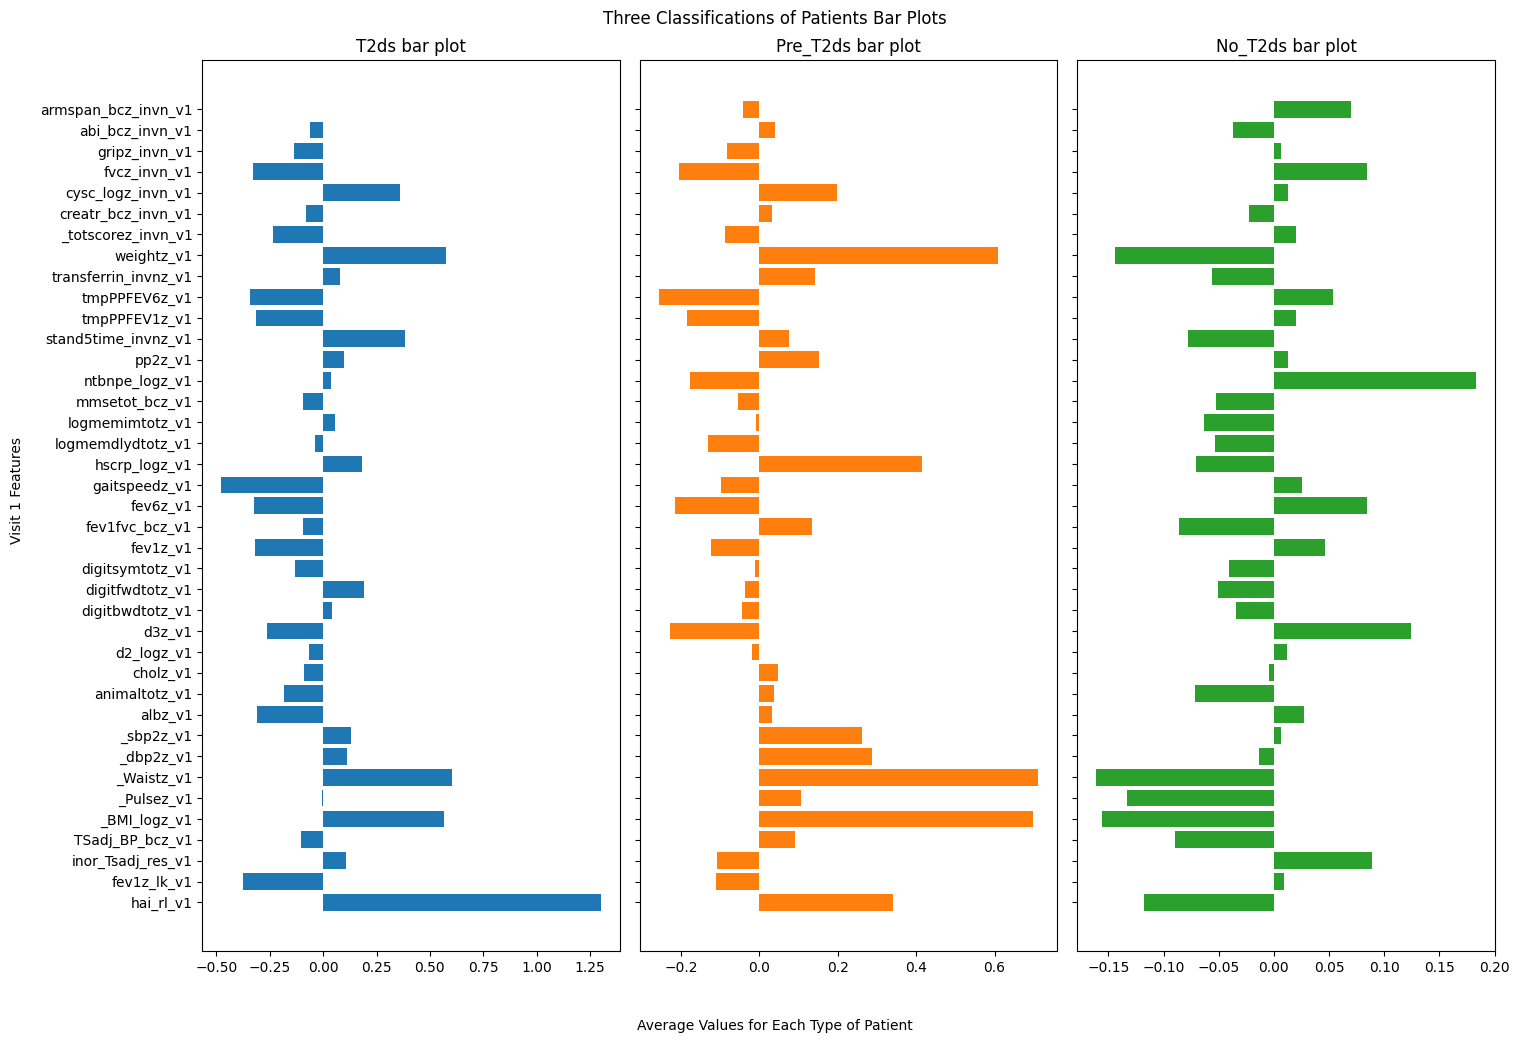

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for three bar plots
x1 = np.array(bar_t2ds_phenodata_average_list)
x2 = np.array(bar_pret2ds_phenodata_average_list)
x3 = np.array(bar_no_t2ds_phenodata_average_list)
y1 = np.array(bar_label_phenodata_df_rvid_v1_continous_name_list)

# Create a figure and subplots with shared y-axis
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

# Set colors for each bar plot
colors = ['C0', 'C1', 'C2']

# Plot the first bar plot
axes[0].barh(y1, x1, color=colors[0])
axes[0].set_title('T2ds bar plot')

# Plot the second bar plot
axes[1].barh(y1, x2, color=colors[1])
axes[1].set_title('Pre_T2ds bar plot')

# Plot the third bar plot
axes[2].barh(y1, x3, color=colors[2])
axes[2].set_title('No_T2ds bar plot')

# Set common labels and title for the subplots
fig.text(0.5, -0.04, 'Average Values for Each Type of Patient', ha='center')
fig.text(-0.01, 0.5, 'Visit 1 Features', va='center', rotation='vertical')
fig.suptitle('Three Classifications of Patients Bar Plots')

# Adjust the spacing between subplots
plt.tight_layout()

#### 2.3.3 Statistical analysis with Fold-Change for clinical features

In [27]:
import math

def calculate_log2_fold_change(sample1, sample2):
    fold_change = sample2 / sample1
    log2_fold_change = math.log2(fold_change)
    return log2_fold_change

def sample_log2_fold_change_comparison(list1, list2):
    log2_fold_change_list = []
    for sample1, sample2 in zip(list1, list2):
        log2_fold_change = calculate_log2_fold_change(sample1, sample2)
        log2_fold_change_list.append(log2_fold_change)
    
    print("Log2 fold changes:")
    for i, log2_fc in enumerate(log2_fold_changes):
        print(f"Sample {i+1}: {log2_fc}")

    return log2_fold_change_list

# # Fold-change comparisons with math domain error (cause the elements in the those lists have negative values)
# t2ds_pret2ds_fold_change_list = sample_log2_fold_change_comparison(t2ds_phenodata_average_list, pret2ds_phenodata_average_list)
# t2ds_no_t2ds_fold_change_list = sample_log2_fold_change_comparison(t2ds_phenodata_average_list, no_t2ds_phenodata_average_list)
# pret2ds_no_t2ds_fold_change_list = sample_log2_fold_change_comparison(pret2ds_phenodata_average_list, no_t2ds_phenodata_average_list)

#### 2.3.4 Statistical analysis for transcriptomics data

In [28]:
# Keep the subject in the columns for certain types of patients
t2ds_merged_tran_v1_df = merged_tran_v1_df[['gene_name'] + t2ds_list] # [68 t2ds]
display(t2ds_merged_tran_v1_df)
t2ds_merged_tran_v1_transposed_df = t2ds_merged_tran_v1_df.T
t2ds_merged_tran_v1_transposed_df.columns = t2ds_merged_tran_v1_transposed_df.iloc[0]
t2ds_merged_tran_v1_transposed_df = t2ds_merged_tran_v1_transposed_df[1:] 
# convert index to first column with the name 'subject' and remove the index name
t2ds_merged_tran_v1_transposed_df.reset_index(level=0, inplace=True)
t2ds_merged_tran_v1_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
display(t2ds_merged_tran_v1_transposed_df)

pret2ds_merged_tran_v1_df = merged_tran_v1_df[['gene_name'] + pret2ds_list] # [105 pret2ds]
display(pret2ds_merged_tran_v1_df)
pret2ds_merged_tran_v1_transposed_df = pret2ds_merged_tran_v1_df.T
pret2ds_merged_tran_v1_transposed_df.columns = pret2ds_merged_tran_v1_transposed_df.iloc[0]
pret2ds_merged_tran_v1_transposed_df = pret2ds_merged_tran_v1_transposed_df[1:]
pret2ds_merged_tran_v1_transposed_df.reset_index(level=0, inplace=True)
pret2ds_merged_tran_v1_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
display(pret2ds_merged_tran_v1_transposed_df)

no_t2ds_merged_tran_v1_df = merged_tran_v1_df[['gene_name'] + no_t2ds_list] # [642 no_t2ds]
display(no_t2ds_merged_tran_v1_df)
no_t2ds_merged_tran_v1_transposed_df = no_t2ds_merged_tran_v1_df.T
no_t2ds_merged_tran_v1_transposed_df.columns = no_t2ds_merged_tran_v1_transposed_df.iloc[0]
no_t2ds_merged_tran_v1_transposed_df = no_t2ds_merged_tran_v1_transposed_df[1:]
no_t2ds_merged_tran_v1_transposed_df.reset_index(level=0, inplace=True)
no_t2ds_merged_tran_v1_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
display(no_t2ds_merged_tran_v1_transposed_df)

,gene_name,281,1084,1276,1434,1451,1945,1947,1958,1975,...,21451,21839,22038,22041,22056,25774,25776,30325,30862,30901
0,ABL1,-0.217405,-0.096727,0.073386,0.278920,0.089397,-0.031130,-0.006755,-0.147860,-0.083485,...,-0.199670,0.037063,-0.114817,0.097621,-0.167909,0.191798,0.058923,0.028061,0.224348,-0.048735
1,ABL2,-0.110338,0.132139,0.151493,-0.202016,-0.137678,0.247660,0.570610,0.326628,-0.030056,...,0.061192,-0.260957,-0.078416,0.197453,-0.213575,-0.166803,-0.455293,0.334103,-0.131276,-0.094112
2,ACAA1,0.117092,0.184387,0.140584,-0.064059,0.100951,0.106488,-0.192651,0.002791,-0.213055,...,-0.049891,0.054538,0.267702,0.062277,-0.010905,-0.029556,0.112918,-0.132635,0.069310,0.012721
3,ACACA,0.137344,-1.042026,0.133402,-0.153634,-0.206620,-0.180200,0.259345,-0.177425,-0.216820,...,-0.099785,0.371915,0.254688,0.180944,-0.429690,-0.079281,-0.273653,-0.063448,-0.121400,0.151979
4,ACACB,0.491214,0.140967,0.504053,0.184735,0.192434,-0.195304,0.044385,0.390115,1.053804,...,0.276293,-0.270619,0.465333,0.440591,0.082662,0.253498,0.536677,0.753988,0.447301,0.622587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,0.326558,0.008325,-0.156002,0.117727,-0.043458,0.077585,0.169275,0.035793,0.145196,...,0.044799,-0.006996,-0.380897,0.362801,-0.163859,0.169737,-0.020482,0.266622,0.094399,-0.181213
1386,ZFYVE9,-0.020235,-0.383219,0.148142,0.221990,0.372184,-0.051750,-0.291783,-0.053248,-0.247075,...,-0.146692,-0.055033,-0.401109,-0.108249,0.018728,-0.386644,-0.228283,-0.009771,0.083689,0.604259
1387,ZMAT3,0.357084,0.200492,-0.051935,0.280838,-0.107162,-0.348289,-0.427961,0.197441,0.212903,...,-0.100392,0.049859,0.113161,-0.085199,-0.103648,-0.020344,0.090163,0.101897,0.126614,-0.135792
1388,ZNF274,-0.016104,-0.165453,0.147361,0.176465,-0.047181,-0.077442,0.209869,-0.041144,0.037463,...,0.018189,0.055407,0.212090,-0.039173,0.413983,0.239169,-0.087320,-0.084911,-0.168108,-0.003758


gene_name,subject,ABL1,ABL2,ACAA1,ACACA,ACACB,ACADM,ACOX1,ACOX3,ACSL1,...,YWHAG,YWHAH,YWHAQ,YWHAZ,ZAP70,ZFYVE16,ZFYVE9,ZMAT3,ZNF274,ZNRF3
0,281,-0.217405,-0.110338,0.117092,0.137344,0.491214,0.464814,-0.671398,-0.036593,0.0295,...,-0.099439,0.048845,-0.097093,0.011472,0.219082,0.326558,-0.020235,0.357084,-0.016104,0.377901
1,1084,-0.096727,0.132139,0.184387,-1.042026,0.140967,-0.15756,-0.074587,0.434602,-0.184309,...,-0.050102,-0.134712,-0.080772,-0.037887,-0.112814,0.008325,-0.383219,0.200492,-0.165453,0.400722
2,1276,0.073386,0.151493,0.140584,0.133402,0.504053,0.03536,0.091975,-0.08954,0.122262,...,-0.118552,-0.066912,0.163143,0.050059,-0.020511,-0.156002,0.148142,-0.051935,0.147361,0.306855
3,1434,0.27892,-0.202016,-0.064059,-0.153634,0.184735,0.296885,0.100146,0.074282,-0.112177,...,-0.02777,-0.166726,-0.210174,-0.011555,-0.083813,0.117727,0.22199,0.280838,0.176465,-0.136797
4,1451,0.089397,-0.137678,0.100951,-0.20662,0.192434,0.259528,0.289901,0.264573,-0.031269,...,-0.090493,0.072328,-0.161525,0.050366,0.045725,-0.043458,0.372184,-0.107162,-0.047181,0.290043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,25774,0.191798,-0.166803,-0.029556,-0.079281,0.253498,0.104481,0.101716,-0.266384,-0.07364,...,0.189666,0.082342,-0.017933,-0.089564,0.064891,0.169737,-0.386644,-0.020344,0.239169,0.211958
64,25776,0.058923,-0.455293,0.112918,-0.273653,0.536677,-0.128863,-0.504288,-0.18895,0.033659,...,-0.06994,-0.044867,-0.080697,-0.061405,-0.123413,-0.020482,-0.228283,0.090163,-0.08732,0.167132
65,30325,0.028061,0.334103,-0.132635,-0.063448,0.753988,-0.305992,-0.632795,0.022997,0.218255,...,-0.051023,-0.126121,-0.056884,-0.111012,-0.066165,0.266622,-0.009771,0.101897,-0.084911,-0.108939
66,30862,0.224348,-0.131276,0.06931,-0.1214,0.447301,0.042571,-0.086172,0.185959,0.060504,...,0.027538,0.099694,-0.168136,-0.217007,-0.2672,0.094399,0.083689,0.126614,-0.168108,0.058947


,gene_name,240,249,253,258,1017,1020,1274,1277,1297,...,21820,21849,22054,22168,25777,25784,30369,30574,30863,31003
0,ABL1,-0.190760,-0.009954,-0.017028,-0.109639,0.216744,0.057225,-0.153597,0.013003,-0.024604,...,0.109856,0.219431,-0.320108,0.159748,-0.165885,-0.050842,-0.201225,0.078543,-0.196966,0.017865
1,ABL2,0.044898,-0.077948,0.044443,0.196437,-0.158787,0.061796,0.067305,-0.078993,0.176418,...,-0.043259,0.226621,-0.157126,-0.178103,-0.102933,-0.179615,-0.199180,-0.075705,0.460728,-0.149124
2,ACAA1,-0.133285,-0.152690,-0.151337,0.049988,-0.028933,-0.128754,0.033028,-0.173530,-0.011818,...,0.040692,-0.335284,0.206078,-0.088214,-0.082293,0.084649,0.193330,-0.050768,-0.198515,-0.042529
3,ACACA,0.315660,0.003932,0.342502,-0.036089,-0.162994,0.403582,-0.145169,-0.003797,-0.059756,...,-0.033911,0.064696,-0.267632,-0.133763,-0.114164,-0.512422,-0.075403,-0.377307,0.035988,-0.380554
4,ACACB,-0.364137,-0.642800,-0.142846,-0.229255,-0.331689,0.153879,0.143564,0.093997,0.413357,...,0.086779,-0.680066,-0.572692,0.058932,-0.350540,-0.829273,0.055544,-0.300639,-0.540015,-0.200984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,0.144254,-0.126269,-0.086516,-0.117733,0.184880,0.320176,0.040917,0.046309,-0.082017,...,-0.031977,0.175466,0.149146,-0.187891,-0.318526,-0.466628,0.226367,-0.126438,-0.017644,-0.398918
1386,ZFYVE9,-0.389601,0.009002,-0.086296,0.022156,-0.106046,0.119874,0.158435,0.132230,0.510936,...,-0.441744,0.159013,0.025800,0.128619,0.435280,-0.327574,-0.034042,0.104569,-0.085715,0.485937
1387,ZMAT3,-0.110290,0.097295,0.142761,0.081524,0.124609,-0.114418,0.158643,0.058708,-0.111247,...,0.013147,-0.309625,-0.370342,0.258871,0.148327,-0.036365,-0.220022,0.272413,-0.278139,0.352023
1388,ZNF274,0.153048,0.211681,-0.111467,-0.084581,-0.053355,0.014066,-0.152178,-0.208486,-0.196768,...,-0.040885,-0.174075,-0.382339,-0.363144,0.284201,-0.064573,-0.019027,-0.264833,-0.126608,-0.109853


gene_name,subject,ABL1,ABL2,ACAA1,ACACA,ACACB,ACADM,ACOX1,ACOX3,ACSL1,...,YWHAG,YWHAH,YWHAQ,YWHAZ,ZAP70,ZFYVE16,ZFYVE9,ZMAT3,ZNF274,ZNRF3
0,240,-0.19076,0.044898,-0.133285,0.31566,-0.364137,0.000417,-0.013663,-0.249793,-0.147336,...,0.104721,-0.104174,-0.208672,-0.00788,0.01509,0.144254,-0.389601,-0.11029,0.153048,-0.305924
1,249,-0.009954,-0.077948,-0.15269,0.003932,-0.6428,0.125412,0.217988,0.145257,0.291401,...,0.043326,0.05631,0.046647,-0.044878,-0.171632,-0.126269,0.009002,0.097295,0.211681,-0.256707
2,253,-0.017028,0.044443,-0.151337,0.342502,-0.142846,0.189352,0.034159,-0.100369,-0.01583,...,-0.155311,-0.013026,0.379151,0.08104,-0.074712,-0.086516,-0.086296,0.142761,-0.111467,0.149141
3,258,-0.109639,0.196437,0.049988,-0.036089,-0.229255,0.14387,-0.497087,-0.191998,0.12949,...,-0.164333,-0.045167,0.13184,0.067866,-0.0559,-0.117733,0.022156,0.081524,-0.084581,-0.140952
4,1017,0.216744,-0.158787,-0.028933,-0.162994,-0.331689,-0.232132,0.182256,-0.462645,0.179381,...,0.10373,0.0621,0.049278,-0.11343,-0.063921,0.18488,-0.106046,0.124609,-0.053355,-0.08991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,25784,-0.050842,-0.179615,0.084649,-0.512422,-0.829273,0.40955,-0.247467,0.17947,-0.045271,...,0.056688,0.064506,-0.014852,0.125336,-0.109428,-0.466628,-0.327574,-0.036365,-0.064573,-0.270642
100,30369,-0.201225,-0.19918,0.19333,-0.075403,0.055544,0.128949,0.048385,0.230733,0.178306,...,-0.012962,-0.162802,-0.090852,-0.070999,-0.071552,0.226367,-0.034042,-0.220022,-0.019027,-0.393763
101,30574,0.078543,-0.075705,-0.050768,-0.377307,-0.300639,-0.274993,0.152695,0.079389,0.022797,...,-0.041255,0.060137,0.042591,0.050382,0.105892,-0.126438,0.104569,0.272413,-0.264833,-0.427977
102,30863,-0.196966,0.460728,-0.198515,0.035988,-0.540015,0.009155,-0.046429,0.454741,0.197897,...,0.126019,-0.032617,-0.109204,-0.089776,-0.093152,-0.017644,-0.085715,-0.278139,-0.126608,-0.249695


,gene_name,118,124,234,236,238,239,242,243,250,...,30572,30865,30866,30998,31001,31004,31010,31011,31014,31015
0,ABL1,0.045569,-0.289207,-0.158553,-0.288357,0.109278,0.078483,0.020950,0.042264,-0.120148,...,-0.178315,0.246303,0.067281,0.011974,0.010367,-0.077208,-0.165029,0.025937,0.445104,-0.207089
1,ABL2,-0.297029,0.170498,-0.101604,0.191166,-0.168715,0.267829,-0.038804,-0.377387,0.069950,...,0.180301,-0.059142,-0.095969,-0.088583,0.184746,-0.263268,0.076603,-0.098164,-0.090221,0.026903
2,ACAA1,0.081568,-0.041679,0.118627,-0.085628,-0.059947,0.012210,-0.051735,-0.037217,0.113519,...,0.277758,0.083069,-0.046245,-0.141169,-0.033366,-0.065391,0.042823,-0.098387,-0.066164,0.167824
3,ACACA,-0.107004,0.212079,0.560545,0.224979,-0.099978,0.086565,0.148278,-0.071382,0.436387,...,-0.050317,0.323634,-0.217936,0.293693,0.405874,0.343101,0.054271,0.195600,-0.566305,-0.040361
4,ACACB,0.425639,0.125842,-0.010969,0.388851,0.143613,-0.000944,0.204372,-0.156980,0.242557,...,0.536557,-0.100908,0.292122,0.089960,0.003206,0.259279,-0.052328,0.171885,0.078642,-0.714164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,0.437614,-0.257814,0.123944,0.020809,-0.111271,0.069015,-0.137835,-0.041021,-0.082133,...,0.259900,0.342777,-0.170552,-0.026334,0.148052,-0.297247,-0.127417,-0.092315,0.016463,-0.370063
1386,ZFYVE9,0.190978,-0.140051,-0.218682,0.294628,-0.390006,0.424386,0.541706,0.163744,-0.041834,...,-0.000914,-0.234398,-0.202933,-0.198160,-0.059862,0.227785,-0.016000,-0.240390,0.170499,0.299275
1387,ZMAT3,-0.039668,0.047657,0.181485,0.012504,0.181664,-0.377753,0.002823,0.077332,0.103074,...,0.127077,-0.121865,0.008214,-0.000396,-0.110246,0.017770,0.058756,0.296240,-0.001597,-0.216371
1388,ZNF274,-0.040415,0.264087,0.120704,0.100214,-0.067179,-0.149785,0.070916,0.010536,-0.076256,...,-0.080482,-0.036130,-0.060890,0.077359,-0.299427,-0.056370,0.308799,0.203357,-0.199736,-0.010621


gene_name,subject,ABL1,ABL2,ACAA1,ACACA,ACACB,ACADM,ACOX1,ACOX3,ACSL1,...,YWHAG,YWHAH,YWHAQ,YWHAZ,ZAP70,ZFYVE16,ZFYVE9,ZMAT3,ZNF274,ZNRF3
0,118,0.045569,-0.297029,0.081568,-0.107004,0.425639,-0.256289,0.047757,-0.066427,-0.009413,...,-0.111418,0.0156,-0.010213,0.13069,0.045734,0.437614,0.190978,-0.039668,-0.040415,0.055859
1,124,-0.289207,0.170498,-0.041679,0.212079,0.125842,0.135971,-0.152678,-0.006442,0.057676,...,0.038567,0.031691,-0.034266,0.173316,0.05132,-0.257814,-0.140051,0.047657,0.264087,0.120768
2,234,-0.158553,-0.101604,0.118627,0.560545,-0.010969,0.289415,0.099605,0.159271,-0.272864,...,0.0876,0.013885,-0.147623,-0.008256,-0.237864,0.123944,-0.218682,0.181485,0.120704,-0.130722
3,236,-0.288357,0.191166,-0.085628,0.224979,0.388851,0.354335,0.256228,-0.137352,-0.049357,...,0.008106,-0.0301,0.367889,-0.03432,-0.045488,0.020809,0.294628,0.012504,0.100214,-0.194369
4,238,0.109278,-0.168715,-0.059947,-0.099978,0.143613,0.12749,0.017972,-0.2781,-0.200189,...,-0.079519,-0.213746,0.075803,0.00955,-0.001059,-0.111271,-0.390006,0.181664,-0.067179,0.089467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636,31004,-0.077208,-0.263268,-0.065391,0.343101,0.259279,0.09734,0.093458,-0.159452,-0.099259,...,0.004735,-0.098386,0.060241,-0.096831,0.050756,-0.297247,0.227785,0.01777,-0.05637,-0.280473
637,31010,-0.165029,0.076603,0.042823,0.054271,-0.052328,0.320046,0.107436,-0.056909,-0.086773,...,0.015337,0.079663,0.065955,0.029786,-0.067261,-0.127417,-0.016,0.058756,0.308799,-0.090747
638,31011,0.025937,-0.098164,-0.098387,0.1956,0.171885,-0.297825,0.139903,-0.197323,-0.106347,...,-0.089778,-0.030462,0.376143,-0.091524,-0.023934,-0.092315,-0.24039,0.29624,0.203357,0.165786
639,31014,0.445104,-0.090221,-0.066164,-0.566305,0.078642,-0.096162,0.219915,-0.113673,-0.221706,...,0.165545,0.080664,0.121358,-0.098566,-0.031863,0.016463,0.170499,-0.001597,-0.199736,-0.058827


In [29]:
from scipy.stats import ks_2samp
p_value_ks_t2ds_pret2ds_list = []
p_value_ks_t2ds_no_t2ds_list = []
p_value_ks_pret2ds_no_t2ds_list = []
merged_tran_v1_col_name_list = list(t2ds_merged_tran_v1_transposed_df.columns)[1:]
for col_name in merged_tran_v1_col_name_list:
    t2ds_feature_list = list(t2ds_merged_tran_v1_transposed_df[col_name])
    pret2ds_feature_list = list(pret2ds_merged_tran_v1_transposed_df[col_name])
    no_t2ds_feature_list = list(no_t2ds_merged_tran_v1_transposed_df[col_name])
    # [t2ds/ pret2ds]
    ks_stat_t2ds_pret2ds, p_value_ks_t2ds_pret2ds = ks_2samp(t2ds_feature_list, pret2ds_feature_list)
    p_value_ks_t2ds_pret2ds_list.append(p_value_ks_t2ds_pret2ds)
    # print('[t2ds/ pret2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_pret2ds)
    # [t2ds/ no_t2ds]
    ks_stat_t2ds_no_t2ds, p_value_ks_t2ds_no_t2ds = ks_2samp(t2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_t2ds_no_t2ds_list.append(p_value_ks_t2ds_no_t2ds)
    # print('[t2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_no_t2ds)
    # [pret2ds/ no_t2ds]
    ks_stat_pret2ds_no_t2ds, p_value_ks_pret2ds_no_t2ds = ks_2samp(pret2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_pret2ds_no_t2ds_list.append(p_value_ks_pret2ds_no_t2ds)
    # print('[pret2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_pret2ds_no_t2ds)

merged_transcriptomics_pvalue_df = pd.DataFrame({
    'gene_names': merged_tran_v1_col_name_list,
    't2ds_pret2ds_pvalue': p_value_ks_t2ds_pret2ds_list,
    't2ds_no_t2ds_pvalue': p_value_ks_t2ds_no_t2ds_list,
    'pret2ds_no_t2ds_pvalue': p_value_ks_pret2ds_no_t2ds_list
})
display(merged_transcriptomics_pvalue_df)
merged_transcriptomics_pvalue_df.to_csv('./data/stat_data/merged_transcriptomics_pvalue.csv', index=False, header=True)

,gene_names,t2ds_pret2ds_pvalue,t2ds_no_t2ds_pvalue,pret2ds_no_t2ds_pvalue
0,ABL1,0.131430,0.153549,0.422268
1,ABL2,0.593557,0.627649,0.763326
2,ACAA1,0.054645,0.010129,0.822815
3,ACACA,0.259524,0.583127,0.360258
4,ACACB,0.003309,0.015971,0.150471
...,...,...,...,...
1385,ZFYVE16,0.619119,0.521577,0.875682
1386,ZFYVE9,0.118627,0.589930,0.322934
1387,ZMAT3,0.703735,0.127968,0.130847
1388,ZNF274,0.691344,0.545350,0.927661


#### 2.3.5 Statistical analysis for epigenomics data

In [30]:
### Keep the subject in the columns for certain types of patients for core promoters
# t2ds for core promoters
t2ds_merged_core_promoter_df = merged_core_promoter_df[['gene_name'] + t2ds_list] # [68 t2ds]
t2ds_merged_core_promoter_transposed_df = t2ds_merged_core_promoter_df.T
t2ds_merged_core_promoter_transposed_df.columns = t2ds_merged_core_promoter_transposed_df.iloc[0]
t2ds_merged_core_promoter_transposed_df = t2ds_merged_core_promoter_transposed_df[1:]
t2ds_merged_core_promoter_transposed_df.reset_index(level=0, inplace=True)
t2ds_merged_core_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# pret2ds for core promoters
pret2ds_merged_core_promoter_df = merged_core_promoter_df[['gene_name'] + pret2ds_list] # [105 pret2ds]
pret2ds_merged_core_promoter_transposed_df = pret2ds_merged_core_promoter_df.T
pret2ds_merged_core_promoter_transposed_df.columns = pret2ds_merged_core_promoter_transposed_df.iloc[0]
pret2ds_merged_core_promoter_transposed_df = pret2ds_merged_core_promoter_transposed_df[1:]
pret2ds_merged_core_promoter_transposed_df.reset_index(level=0, inplace=True)
pret2ds_merged_core_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# no_t2ds for core promoters
no_t2ds_merged_core_promoter_df = merged_core_promoter_df[['gene_name'] + no_t2ds_list] # [642 no_t2ds]
no_t2ds_merged_core_promoter_transposed_df = no_t2ds_merged_core_promoter_df.T
no_t2ds_merged_core_promoter_transposed_df.columns = no_t2ds_merged_core_promoter_transposed_df.iloc[0]
no_t2ds_merged_core_promoter_transposed_df = no_t2ds_merged_core_promoter_transposed_df[1:]
no_t2ds_merged_core_promoter_transposed_df.reset_index(level=0, inplace=True)
no_t2ds_merged_core_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)

from scipy.stats import ks_2samp
p_value_ks_t2ds_pret2ds_list = []
p_value_ks_t2ds_no_t2ds_list = []
p_value_ks_pret2ds_no_t2ds_list = []
merged_core_promoter_col_name_list = list(t2ds_merged_core_promoter_transposed_df.columns)[1:]
for col_name in merged_core_promoter_col_name_list:
    t2ds_feature_list = list(t2ds_merged_core_promoter_transposed_df[col_name])
    pret2ds_feature_list = list(pret2ds_merged_core_promoter_transposed_df[col_name])
    no_t2ds_feature_list = list(no_t2ds_merged_core_promoter_transposed_df[col_name])
    # [t2ds/ pret2ds]
    ks_stat_t2ds_pret2ds, p_value_ks_t2ds_pret2ds = ks_2samp(t2ds_feature_list, pret2ds_feature_list)
    p_value_ks_t2ds_pret2ds_list.append(p_value_ks_t2ds_pret2ds)
    # print('[t2ds/ pret2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_pret2ds)
    # [t2ds/ no_t2ds]
    ks_stat_t2ds_no_t2ds, p_value_ks_t2ds_no_t2ds = ks_2samp(t2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_t2ds_no_t2ds_list.append(p_value_ks_t2ds_no_t2ds)
    # print('[t2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_no_t2ds)
    # [pret2ds/ no_t2ds]
    ks_stat_pret2ds_no_t2ds, p_value_ks_pret2ds_no_t2ds = ks_2samp(pret2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_pret2ds_no_t2ds_list.append(p_value_ks_pret2ds_no_t2ds)
    # print('[pret2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_pret2ds_no_t2ds)

merged_core_promoter_pvalue_df = pd.DataFrame({
    'gene_names': merged_core_promoter_col_name_list,
    't2ds_pret2ds_pvalue': p_value_ks_t2ds_pret2ds_list,
    't2ds_no_t2ds_pvalue': p_value_ks_t2ds_no_t2ds_list,
    'pret2ds_no_t2ds_pvalue': p_value_ks_pret2ds_no_t2ds_list
})
display(merged_core_promoter_pvalue_df)
merged_core_promoter_pvalue_df.to_csv('./data/stat_data/merged_core_promoter_pvalue.csv', index=False, header=True)

,gene_names,t2ds_pret2ds_pvalue,t2ds_no_t2ds_pvalue,pret2ds_no_t2ds_pvalue
0,ABL1,0.138388,0.255684,0.186244
1,ABL2,0.866865,0.867864,0.285361
2,ACAA1,0.674259,0.383650,0.285866
3,ACACA,0.564483,0.430702,0.619358
4,ACACB,0.613007,0.413880,0.095722
...,...,...,...,...
1385,ZFYVE16,0.985029,0.722187,0.356811
1386,ZFYVE9,0.241271,0.082400,0.079350
1387,ZMAT3,0.856517,0.921394,0.896721
1388,ZNF274,0.308153,0.196544,0.865941


In [31]:
# Keep the subject in the columns for certain types of patients for proximal promoters
# t2ds for proximal promoters
t2ds_merged_proximal_promoter_df = merged_proximal_promoter_df[['gene_name'] + t2ds_list] # [68 t2ds]
t2ds_merged_proximal_promoter_transposed_df = t2ds_merged_proximal_promoter_df.T
t2ds_merged_proximal_promoter_transposed_df.columns = t2ds_merged_proximal_promoter_transposed_df.iloc[0]
t2ds_merged_proximal_promoter_transposed_df = t2ds_merged_proximal_promoter_transposed_df[1:]
t2ds_merged_proximal_promoter_transposed_df.reset_index(level=0, inplace=True)
t2ds_merged_proximal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# pret2ds for proximal promoters
pret2ds_merged_proximal_promoter_df = merged_proximal_promoter_df[['gene_name'] + pret2ds_list] # [105 pret2ds]
pret2ds_merged_proximal_promoter_transposed_df = pret2ds_merged_proximal_promoter_df.T
pret2ds_merged_proximal_promoter_transposed_df.columns = pret2ds_merged_proximal_promoter_transposed_df.iloc[0]
pret2ds_merged_proximal_promoter_transposed_df = pret2ds_merged_proximal_promoter_transposed_df[1:]
pret2ds_merged_proximal_promoter_transposed_df.reset_index(level=0, inplace=True)
pret2ds_merged_proximal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# no_t2ds for proximal promoters
no_t2ds_merged_proximal_promoter_df = merged_proximal_promoter_df[['gene_name'] + no_t2ds_list] # [642 no_t2ds]
no_t2ds_merged_proximal_promoter_transposed_df = no_t2ds_merged_proximal_promoter_df.T
no_t2ds_merged_proximal_promoter_transposed_df.columns = no_t2ds_merged_proximal_promoter_transposed_df.iloc[0]
no_t2ds_merged_proximal_promoter_transposed_df = no_t2ds_merged_proximal_promoter_transposed_df[1:]
no_t2ds_merged_proximal_promoter_transposed_df.reset_index(level=0, inplace=True)
no_t2ds_merged_proximal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)

from scipy.stats import ks_2samp
p_value_ks_t2ds_pret2ds_list = []
p_value_ks_t2ds_no_t2ds_list = []
p_value_ks_pret2ds_no_t2ds_list = []
merged_proximal_promoter_col_name_list = list(t2ds_merged_proximal_promoter_transposed_df.columns)[1:]
for col_name in merged_proximal_promoter_col_name_list:
    t2ds_feature_list = list(t2ds_merged_proximal_promoter_transposed_df[col_name])
    pret2ds_feature_list = list(pret2ds_merged_proximal_promoter_transposed_df[col_name])
    no_t2ds_feature_list = list(no_t2ds_merged_proximal_promoter_transposed_df[col_name])
    # [t2ds/ pret2ds]
    ks_stat_t2ds_pret2ds, p_value_ks_t2ds_pret2ds = ks_2samp(t2ds_feature_list, pret2ds_feature_list)
    p_value_ks_t2ds_pret2ds_list.append(p_value_ks_t2ds_pret2ds)
    # print('[t2ds/ pret2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_pret2ds)
    # [t2ds/ no_t2ds]
    ks_stat_t2ds_no_t2ds, p_value_ks_t2ds_no_t2ds = ks_2samp(t2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_t2ds_no_t2ds_list.append(p_value_ks_t2ds_no_t2ds)
    # print('[t2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_no_t2ds)
    # [pret2ds/ no_t2ds]
    ks_stat_pret2ds_no_t2ds, p_value_ks_pret2ds_no_t2ds = ks_2samp(pret2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_pret2ds_no_t2ds_list.append(p_value_ks_pret2ds_no_t2ds)
    # print('[pret2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_pret2ds_no_t2ds)

merged_proximal_promoter_pvalue_df = pd.DataFrame({
    'gene_names': merged_proximal_promoter_col_name_list,
    't2ds_pret2ds_pvalue': p_value_ks_t2ds_pret2ds_list,
    't2ds_no_t2ds_pvalue': p_value_ks_t2ds_no_t2ds_list,
    'pret2ds_no_t2ds_pvalue': p_value_ks_pret2ds_no_t2ds_list
})
display(merged_proximal_promoter_pvalue_df)
merged_proximal_promoter_pvalue_df.to_csv('./data/stat_data/merged_proximal_promoter_pvalue.csv', index=False, header=True)


,gene_names,t2ds_pret2ds_pvalue,t2ds_no_t2ds_pvalue,pret2ds_no_t2ds_pvalue
0,ABL1,0.248669,0.067468,0.381613
1,ABL2,0.150388,0.085645,0.955569
2,ACAA1,0.581863,0.101876,0.044553
3,ACACA,0.809272,0.839916,0.145467
4,ACACB,0.861892,0.181725,0.028307
...,...,...,...,...
1385,ZFYVE16,0.443770,0.239666,0.321517
1386,ZFYVE9,0.027168,0.173578,0.078725
1387,ZMAT3,0.545750,0.820611,0.874041
1388,ZNF274,0.125154,0.081544,0.329472


In [32]:
# Keep the subject in the columns for certain types of patients for distal promoters
# t2ds for distal promoters
t2ds_merged_distal_promoter_df = merged_distal_promoter_df[['gene_name'] + t2ds_list] # [68 t2ds]
t2ds_merged_distal_promoter_transposed_df = t2ds_merged_distal_promoter_df.T
t2ds_merged_distal_promoter_transposed_df.columns = t2ds_merged_distal_promoter_transposed_df.iloc[0]
t2ds_merged_distal_promoter_transposed_df = t2ds_merged_distal_promoter_transposed_df[1:]
t2ds_merged_distal_promoter_transposed_df.reset_index(level=0, inplace=True)
t2ds_merged_distal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# pret2ds for distal promoters
pret2ds_merged_distal_promoter_df = merged_distal_promoter_df[['gene_name'] + pret2ds_list] # [105 pret2ds]
pret2ds_merged_distal_promoter_transposed_df = pret2ds_merged_distal_promoter_df.T
pret2ds_merged_distal_promoter_transposed_df.columns = pret2ds_merged_distal_promoter_transposed_df.iloc[0]
pret2ds_merged_distal_promoter_transposed_df = pret2ds_merged_distal_promoter_transposed_df[1:]
pret2ds_merged_distal_promoter_transposed_df.reset_index(level=0, inplace=True)
pret2ds_merged_distal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# no_t2ds for distal promoters
no_t2ds_merged_distal_promoter_df = merged_distal_promoter_df[['gene_name'] + no_t2ds_list] # [642 no_t2ds]
no_t2ds_merged_distal_promoter_transposed_df = no_t2ds_merged_distal_promoter_df.T
no_t2ds_merged_distal_promoter_transposed_df.columns = no_t2ds_merged_distal_promoter_transposed_df.iloc[0]
no_t2ds_merged_distal_promoter_transposed_df = no_t2ds_merged_distal_promoter_transposed_df[1:]
no_t2ds_merged_distal_promoter_transposed_df.reset_index(level=0, inplace=True)
no_t2ds_merged_distal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)

from scipy.stats import ks_2samp
p_value_ks_t2ds_pret2ds_list = []
p_value_ks_t2ds_no_t2ds_list = []
p_value_ks_pret2ds_no_t2ds_list = []
merged_distal_promoter_col_name_list = list(t2ds_merged_distal_promoter_transposed_df.columns)[1:]
for col_name in merged_distal_promoter_col_name_list:
    t2ds_feature_list = list(t2ds_merged_distal_promoter_transposed_df[col_name])
    pret2ds_feature_list = list(pret2ds_merged_distal_promoter_transposed_df[col_name])
    no_t2ds_feature_list = list(no_t2ds_merged_distal_promoter_transposed_df[col_name])
    # [t2ds/ pret2ds]
    ks_stat_t2ds_pret2ds, p_value_ks_t2ds_pret2ds = ks_2samp(t2ds_feature_list, pret2ds_feature_list)
    p_value_ks_t2ds_pret2ds_list.append(p_value_ks_t2ds_pret2ds)
    # print('[t2ds/ pret2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_pret2ds)
    # [t2ds/ no_t2ds]
    ks_stat_t2ds_no_t2ds, p_value_ks_t2ds_no_t2ds = ks_2samp(t2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_t2ds_no_t2ds_list.append(p_value_ks_t2ds_no_t2ds)
    # print('[t2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_no_t2ds)
    # [pret2ds/ no_t2ds]
    ks_stat_pret2ds_no_t2ds, p_value_ks_pret2ds_no_t2ds = ks_2samp(pret2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_pret2ds_no_t2ds_list.append(p_value_ks_pret2ds_no_t2ds)
    # print('[pret2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_pret2ds_no_t2ds)

merged_distal_promoter_pvalue_df = pd.DataFrame({
    'gene_names': merged_distal_promoter_col_name_list,
    't2ds_pret2ds_pvalue': p_value_ks_t2ds_pret2ds_list,
    't2ds_no_t2ds_pvalue': p_value_ks_t2ds_no_t2ds_list,
    'pret2ds_no_t2ds_pvalue': p_value_ks_pret2ds_no_t2ds_list
})
display(merged_distal_promoter_pvalue_df)
merged_distal_promoter_pvalue_df.to_csv('./data/stat_data/merged_distal_promoter_pvalue.csv', index=False, header=True)

,gene_names,t2ds_pret2ds_pvalue,t2ds_no_t2ds_pvalue,pret2ds_no_t2ds_pvalue
0,ABL1,0.944411,0.721077,0.355377
1,ABL2,0.417531,0.469998,0.407756
2,ACAA1,0.325568,0.212599,0.917182
3,ACACA,0.613007,0.203656,0.087466
4,ACACB,0.803112,0.103295,0.222689
...,...,...,...,...
1385,ZFYVE16,0.078631,0.002011,0.598101
1386,ZFYVE9,0.372128,0.539066,0.674753
1387,ZMAT3,0.391931,0.077785,0.369294
1388,ZNF274,0.888442,0.339251,0.715971


In [33]:
# Keep the subject in the columns for certain types of patients for distal promoters
# t2ds for distal promoters
t2ds_merged_upstream_df = merged_upstream_df[['gene_name'] + t2ds_list] # [68 t2ds]
t2ds_merged_upstream_transposed_df = t2ds_merged_upstream_df.T
t2ds_merged_upstream_transposed_df.columns = t2ds_merged_upstream_transposed_df.iloc[0]
t2ds_merged_upstream_transposed_df = t2ds_merged_upstream_transposed_df[1:]
t2ds_merged_upstream_transposed_df.reset_index(level=0, inplace=True)
t2ds_merged_upstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# pret2ds for distal promoters
pret2ds_merged_upstream_df = merged_upstream_df[['gene_name'] + pret2ds_list] # [105 pret2ds]
pret2ds_merged_upstream_transposed_df = pret2ds_merged_upstream_df.T
pret2ds_merged_upstream_transposed_df.columns = pret2ds_merged_upstream_transposed_df.iloc[0]
pret2ds_merged_upstream_transposed_df = pret2ds_merged_upstream_transposed_df[1:]
pret2ds_merged_upstream_transposed_df.reset_index(level=0, inplace=True)
pret2ds_merged_upstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# no_t2ds for distal promoters
no_t2ds_merged_upstream_df = merged_upstream_df[['gene_name'] + no_t2ds_list] # [642 no_t2ds]
no_t2ds_merged_upstream_transposed_df = no_t2ds_merged_upstream_df.T
no_t2ds_merged_upstream_transposed_df.columns = no_t2ds_merged_upstream_transposed_df.iloc[0]
no_t2ds_merged_upstream_transposed_df = no_t2ds_merged_upstream_transposed_df[1:]
no_t2ds_merged_upstream_transposed_df.reset_index(level=0, inplace=True)
no_t2ds_merged_upstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)

from scipy.stats import ks_2samp
p_value_ks_t2ds_pret2ds_list = []
p_value_ks_t2ds_no_t2ds_list = []
p_value_ks_pret2ds_no_t2ds_list = []
merged_upstream_col_name_list = list(t2ds_merged_upstream_transposed_df.columns)[1:]
for col_name in merged_upstream_col_name_list:
    t2ds_feature_list = list(t2ds_merged_upstream_transposed_df[col_name])
    pret2ds_feature_list = list(pret2ds_merged_upstream_transposed_df[col_name])
    no_t2ds_feature_list = list(no_t2ds_merged_upstream_transposed_df[col_name])
    # [t2ds/ pret2ds]
    ks_stat_t2ds_pret2ds, p_value_ks_t2ds_pret2ds = ks_2samp(t2ds_feature_list, pret2ds_feature_list)
    p_value_ks_t2ds_pret2ds_list.append(p_value_ks_t2ds_pret2ds)
    # print('[t2ds/ pret2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_pret2ds)
    # [t2ds/ no_t2ds]
    ks_stat_t2ds_no_t2ds, p_value_ks_t2ds_no_t2ds = ks_2samp(t2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_t2ds_no_t2ds_list.append(p_value_ks_t2ds_no_t2ds)
    # print('[t2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_no_t2ds)
    # [pret2ds/ no_t2ds]
    ks_stat_pret2ds_no_t2ds, p_value_ks_pret2ds_no_t2ds = ks_2samp(pret2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_pret2ds_no_t2ds_list.append(p_value_ks_pret2ds_no_t2ds)
    # print('[pret2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_pret2ds_no_t2ds)

merged_upstream_pvalue_df = pd.DataFrame({
    'gene_names': merged_upstream_col_name_list,
    't2ds_pret2ds_pvalue': p_value_ks_t2ds_pret2ds_list,
    't2ds_no_t2ds_pvalue': p_value_ks_t2ds_no_t2ds_list,
    'pret2ds_no_t2ds_pvalue': p_value_ks_pret2ds_no_t2ds_list
})
display(merged_upstream_pvalue_df)
merged_upstream_pvalue_df.to_csv('./data/stat_data/merged_upstream_pvalue.csv', index=False, header=True)

,gene_names,t2ds_pret2ds_pvalue,t2ds_no_t2ds_pvalue,pret2ds_no_t2ds_pvalue
0,ABL1,1.000000,1.000000,1.000000
1,ABL2,0.080086,0.218129,0.073440
2,ACAA1,1.000000,1.000000,1.000000
3,ACACA,1.000000,1.000000,1.000000
4,ACACB,0.815328,0.299290,0.449289
...,...,...,...,...
1385,ZFYVE16,0.114485,0.041683,0.921445
1386,ZFYVE9,1.000000,1.000000,1.000000
1387,ZMAT3,0.803112,0.191686,0.160319
1388,ZNF274,1.000000,1.000000,1.000000


In [34]:
# Keep the subject in the columns for certain types of patients for distal promoters
# t2ds for distal promoters
t2ds_merged_downstream_df = merged_downstream_df[['gene_name'] + t2ds_list] # [68 t2ds]
t2ds_merged_downstream_transposed_df = t2ds_merged_downstream_df.T
t2ds_merged_downstream_transposed_df.columns = t2ds_merged_downstream_transposed_df.iloc[0]
t2ds_merged_downstream_transposed_df = t2ds_merged_downstream_transposed_df[1:]
t2ds_merged_downstream_transposed_df.reset_index(level=0, inplace=True)
t2ds_merged_downstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# pret2ds for distal promoters
pret2ds_merged_downstream_df = merged_downstream_df[['gene_name'] + pret2ds_list] # [105 pret2ds]
pret2ds_merged_downstream_transposed_df = pret2ds_merged_downstream_df.T
pret2ds_merged_downstream_transposed_df.columns = pret2ds_merged_downstream_transposed_df.iloc[0]
pret2ds_merged_downstream_transposed_df = pret2ds_merged_downstream_transposed_df[1:]
pret2ds_merged_downstream_transposed_df.reset_index(level=0, inplace=True)
pret2ds_merged_downstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
# no_t2ds for distal promoters
no_t2ds_merged_downstream_df = merged_downstream_df[['gene_name'] + no_t2ds_list] # [642 no_t2ds]
no_t2ds_merged_downstream_transposed_df = no_t2ds_merged_downstream_df.T
no_t2ds_merged_downstream_transposed_df.columns = no_t2ds_merged_downstream_transposed_df.iloc[0]
no_t2ds_merged_downstream_transposed_df = no_t2ds_merged_downstream_transposed_df[1:]
no_t2ds_merged_downstream_transposed_df.reset_index(level=0, inplace=True)
no_t2ds_merged_downstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)

from scipy.stats import ks_2samp
p_value_ks_t2ds_pret2ds_list = []
p_value_ks_t2ds_no_t2ds_list = []
p_value_ks_pret2ds_no_t2ds_list = []
merged_downstream_col_name_list = list(t2ds_merged_downstream_transposed_df.columns)[1:]
for col_name in merged_downstream_col_name_list:
    t2ds_feature_list = list(t2ds_merged_downstream_transposed_df[col_name])
    pret2ds_feature_list = list(pret2ds_merged_downstream_transposed_df[col_name])
    no_t2ds_feature_list = list(no_t2ds_merged_downstream_transposed_df[col_name])
    # [t2ds/ pret2ds]
    ks_stat_t2ds_pret2ds, p_value_ks_t2ds_pret2ds = ks_2samp(t2ds_feature_list, pret2ds_feature_list)
    p_value_ks_t2ds_pret2ds_list.append(p_value_ks_t2ds_pret2ds)
    # print('[t2ds/ pret2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_pret2ds)
    # [t2ds/ no_t2ds]
    ks_stat_t2ds_no_t2ds, p_value_ks_t2ds_no_t2ds = ks_2samp(t2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_t2ds_no_t2ds_list.append(p_value_ks_t2ds_no_t2ds)
    # print('[t2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_t2ds_no_t2ds)
    # [pret2ds/ no_t2ds]
    ks_stat_pret2ds_no_t2ds, p_value_ks_pret2ds_no_t2ds = ks_2samp(pret2ds_feature_list, no_t2ds_feature_list)
    p_value_ks_pret2ds_no_t2ds_list.append(p_value_ks_pret2ds_no_t2ds)
    # print('[pret2ds/ no_t2ds] Kolmogorov-Smirnov test p-value: ', p_value_ks_pret2ds_no_t2ds)

merged_downstream_pvalue_df = pd.DataFrame({
    'gene_names': merged_downstream_col_name_list,
    't2ds_pret2ds_pvalue': p_value_ks_t2ds_pret2ds_list,
    't2ds_no_t2ds_pvalue': p_value_ks_t2ds_no_t2ds_list,
    'pret2ds_no_t2ds_pvalue': p_value_ks_pret2ds_no_t2ds_list
})
display(merged_downstream_pvalue_df)
merged_downstream_pvalue_df.to_csv('./data/stat_data/merged_downstream_pvalue.csv', index=False, header=True)

,gene_names,t2ds_pret2ds_pvalue,t2ds_no_t2ds_pvalue,pret2ds_no_t2ds_pvalue
0,ABL1,0.636505,0.535873,0.562359
1,ABL2,0.888442,0.021990,0.116430
2,ACAA1,0.316911,0.234859,0.348938
3,ACACA,0.316911,0.009552,0.195858
4,ACACB,0.856517,0.138253,0.118693
...,...,...,...,...
1385,ZFYVE16,0.679968,0.555454,0.163835
1386,ZFYVE9,0.967677,0.209579,0.194638
1387,ZMAT3,0.454805,0.029636,0.018042
1388,ZNF274,0.487951,0.208725,0.049294


## 3. Knowledge Graph Construction

In [35]:
subject_list = list(v1_label_phenodata_df.subject)
print(subject_list)
print('Number of subjects: ', len(subject_list))

['118', '124', '234', '236', '238', '239', '240', '242', '243', '249', '250', '251', '253', '255', '256', '258', '261', '262', '267', '268', '269', '270', '272', '280', '281', '282', '1014', '1017', '1020', '1027', '1079', '1083', '1084', '1087', '1129', '1131', '1132', '1135', '1138', '1157', '1167', '1174', '1176', '1177', '1178', '1181', '1182', '1183', '1268', '1272', '1274', '1276', '1277', '1281', '1282', '1285', '1287', '1288', '1289', '1290', '1297', '1299', '1303', '1361', '1362', '1364', '1365', '1367', '1369', '1370', '1371', '1373', '1375', '1377', '1378', '1386', '1387', '1388', '1389', '1391', '1393', '1400', '1404', '1406', '1410', '1411', '1412', '1415', '1423', '1426', '1429', '1431', '1433', '1434', '1448', '1451', '1452', '1453', '1469', '1473', '1474', '1475', '1476', '1478', '1480', '1481', '1485', '1489', '1491', '1553', '1554', '1559', '1566', '1583', '1587', '1588', '1593', '1595', '1596', '1597', '1598', '1602', '1685', '1686', '1692', '1698', '1699', '1701', '

### 3.1 Build Up Graph Features

In [36]:
### Convert categorical feature into one-hot feature
v1_label_phenodata_onehot_df = v1_label_phenodata_df.drop(columns =['id', 'fc', 'gpedid'])
# One-hot encode the 'sex' column
one_hot_encoded = pd.get_dummies(v1_label_phenodata_onehot_df['sex'], prefix='sex', dtype=int)
v1_label_phenodata_onehot_df = v1_label_phenodata_onehot_df.drop(columns = ['sex'])
# Concatenate the original DataFrame with the one-hot encoded column
v1_label_phenodata_onehot_df = pd.concat([v1_label_phenodata_onehot_df, one_hot_encoded], axis=1)
display(v1_label_phenodata_onehot_df)

,subject,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,_dbp2z_v1,...,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1,sex_1,sex_2
0,118,62.0,0.196684,-0.174840,1.301073,-1.249937,0.717532,-0.091993,1.033138,-0.416714,...,0.672278,-0.566943,1.765985,0.211970,-0.709229,-0.808088,-0.029385,-0.482012,1,0
1,124,68.0,1.582711,0.415445,0.959648,-0.883484,0.386270,-0.091993,0.515470,1.099418,...,1.055116,0.777004,-1.229517,0.218004,1.074278,1.336038,-0.029385,1.240505,1,0
2,234,86.0,0.740793,-0.076216,0.037238,0.076562,-0.450759,-0.091993,-0.363489,-0.643991,...,-0.416688,-0.923783,0.300901,0.015278,-0.639767,0.541525,-0.029385,-0.338051,1,0
3,236,86.0,-0.323309,-0.105740,1.163992,-1.119362,-0.403242,0.712518,-1.245583,-1.058723,...,-0.365382,2.107226,0.366984,-0.863692,-0.147022,0.348508,-0.029385,-0.122128,0,1
4,238,48.0,0.059856,-0.269400,-0.762713,0.843561,0.962464,0.054233,0.479784,0.594027,...,0.872437,0.220589,2.559119,-1.081329,-0.628722,-0.257626,-0.029385,-0.597425,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,31004,72.0,1.109294,-0.083725,1.515900,-1.682905,1.145480,-0.091993,0.725951,-0.166560,...,1.132759,0.441731,-0.677972,0.626428,-0.033596,1.480515,0.809948,0.889124,0,1
809,31010,78.0,1.495321,-0.038309,0.500530,-0.561930,1.797081,-0.091993,0.660368,0.253230,...,2.170785,1.141017,0.463065,0.622519,-1.086421,0.266607,-0.029385,0.157456,0,1
810,31011,76.0,-1.235919,-0.038309,2.979447,-3.144342,-0.013189,-0.552464,0.372168,-0.415416,...,0.240379,-0.925824,-0.091993,-0.686950,2.045356,0.472148,1.278690,1.551555,1,0
811,31014,67.0,-0.379062,-0.038309,2.187931,-2.504050,2.429098,-0.091993,1.264576,0.969331,...,3.023267,-0.394663,-0.111858,0.455044,0.091864,0.392730,-0.869379,0.665608,0,1


In [37]:
### Categorize the feature into different levels by percentile
# check the 5 and 95 percentiles of each feature
feature_10percentile_list = []
fearure_90percentile_list = []
# features_to_remove = ['subject', 'sex']
v1_label_phenodata_feature_list = list(v1_label_phenodata_df.columns)[4:]
print('Number of numerical features: ', len(v1_label_phenodata_feature_list))
# for loop each feature
v1_label_phenodata_category_df = v1_label_phenodata_df.drop(columns =['id', 'fc', 'gpedid'])
for feature in v1_label_phenodata_feature_list:
    feature_value_array = np.array(v1_label_phenodata_df[feature])
    feature_10percentile = np.percentile(feature_value_array, 10)
    feature_10percentile_list.append(feature_10percentile)
    feature_90percentile = np.percentile(feature_value_array, 90)
    fearure_90percentile_list.append(feature_90percentile)
    # print('---------- ' + str(feature) + ' ----------')
    # print('--- 10 percentile of ' + str(feature), feature_10percentile)
    # print('--- 90 percentile of ' + str(feature), feature_90percentile)
    v1_label_phenodata_category_df[feature] = pd.cut(v1_label_phenodata_df[feature], bins=[float('-inf'), feature_10percentile, feature_90percentile, float('inf')], include_lowest=True, labels=[1,2,3])
# convert 5 and 95 percentile of each feature into dataframe
feature_percentile_df = pd.DataFrame({
    'features': v1_label_phenodata_feature_list,
    'feature_10percentile': feature_10percentile_list,
    'feature_90percentile': fearure_90percentile_list
})
display(v1_label_phenodata_category_df)
subfeature_list = []
for feature in v1_label_phenodata_feature_list:
    feature_unique_values = v1_label_phenodata_category_df[feature].nunique()
    for number in np.arange(1, feature_unique_values+1):
        feature_name = feature + '-' + str(number)
        subfeature_list.append(feature_name)

subfeature_node_idx_list = list(np.arange(len(subfeature_list)))
subfeature_node_dict = {k:v for k, v in zip(subfeature_list, subfeature_node_idx_list)}
subfeature_dict_df = pd.DataFrame({'subfeature_node_idx': subfeature_node_idx_list,
                                'subfeature_names': subfeature_list})
if os.path.exists('./data/filtered_data/') == False:
    os.mkdir('./data/filtered_data/')
subfeature_dict_df.to_csv('./data/filtered_data/subfeature_dict_df.csv', index=False, header=True)
display(subfeature_dict_df)

Number of numerical features:  41


,subject,sex,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,...,tmpPPFEV6z_v1,transferrin_invnz_v1,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1
0,118,1,2,2,2,3,2,2,2,2,...,2,3,2,2,3,2,2,2,2,2
1,124,1,2,3,2,2,2,2,2,2,...,2,3,2,2,1,2,2,3,2,2
2,234,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,236,2,2,2,2,2,2,2,2,1,...,2,2,2,3,2,2,2,2,2,2
4,238,2,1,2,2,2,2,2,2,2,...,2,2,2,2,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,31004,2,2,2,2,3,1,2,2,2,...,2,2,2,2,2,2,2,3,3,2
809,31010,2,2,2,2,2,2,3,2,2,...,2,3,3,3,2,2,2,2,2,2
810,31011,1,2,2,2,3,1,2,2,2,...,2,2,2,2,2,2,3,2,3,3
811,31014,2,2,2,2,3,1,3,2,3,...,2,2,3,2,2,2,2,2,1,2


,subfeature_node_idx,subfeature_names
0,0,sex-1
1,1,sex-2
2,2,age_v1-1
3,3,age_v1-2
4,4,age_v1-3
...,...,...
117,117,abi_bcz_invn_v1-2
118,118,abi_bcz_invn_v1-3
119,119,armspan_bcz_invn_v1-1
120,120,armspan_bcz_invn_v1-2


In [38]:
### Create [node_idx and feature] map
num_subfeature = subfeature_dict_df.shape[0]
num_subject = v1_label_phenodata_category_df.shape[0]
# Formalize the map between [node_idx] and [subject]
subject_list = list(v1_label_phenodata_category_df.subject)
subject_name_list = ['subject-' + str(subject) for subject in subject_list]
subject_node_idx_list = list(np.arange(num_subfeature, num_subfeature+num_subject))
# Formalize the subject dictionary
subject_node_dict = {k:v for k, v in zip(subject_list, subject_node_idx_list)}
subject_node_name_dict = {k:v for k, v in zip(subject_name_list, subject_node_idx_list)}
subject_node_index_dict =  {k:v for k, v in zip(subject_node_idx_list, subject_name_list)}
subject_dict_df = pd.DataFrame({'subject_node_idx': subject_node_idx_list,
                            'subject_number': subject_list,
                            'subject_name': subject_name_list})
print(subject_node_dict)
display(subject_dict_df)
subject_dict_df.to_csv('./data/filtered_data/subject_dict_df.csv', index=False, header=True)

# Concatenate [subfeature_dict_df] and [subject_dict_df]
subject_number_dict_df = subject_dict_df.drop(columns=['subject_number'])
subject_number_dict_df = subject_number_dict_df.rename(columns={'subject_node_idx': 'node_idx',
                                                            'subject_name': 'node_name'})
subfeature_dict_df = subfeature_dict_df.rename(columns={'subfeature_node_idx': 'node_idx',
                                                            'subfeature_names': 'node_name'})
node_idx_name_map_df = pd.concat([subfeature_dict_df, subject_number_dict_df])
node_idx_name_map_df = node_idx_name_map_df.reset_index(drop=True)
display(node_idx_name_map_df)
node_idx_name_map_df.to_csv('./data/filtered_data/node_idx_name_map_df.csv', index=False, header=True)
node_name_idx_dict = node_idx_name_map_df.set_index('node_name')['node_idx'].to_dict()
print(node_name_idx_dict)

{'118': 122, '124': 123, '234': 124, '236': 125, '238': 126, '239': 127, '240': 128, '242': 129, '243': 130, '249': 131, '250': 132, '251': 133, '253': 134, '255': 135, '256': 136, '258': 137, '261': 138, '262': 139, '267': 140, '268': 141, '269': 142, '270': 143, '272': 144, '280': 145, '281': 146, '282': 147, '1014': 148, '1017': 149, '1020': 150, '1027': 151, '1079': 152, '1083': 153, '1084': 154, '1087': 155, '1129': 156, '1131': 157, '1132': 158, '1135': 159, '1138': 160, '1157': 161, '1167': 162, '1174': 163, '1176': 164, '1177': 165, '1178': 166, '1181': 167, '1182': 168, '1183': 169, '1268': 170, '1272': 171, '1274': 172, '1276': 173, '1277': 174, '1281': 175, '1282': 176, '1285': 177, '1287': 178, '1288': 179, '1289': 180, '1290': 181, '1297': 182, '1299': 183, '1303': 184, '1361': 185, '1362': 186, '1364': 187, '1365': 188, '1367': 189, '1369': 190, '1370': 191, '1371': 192, '1373': 193, '1375': 194, '1377': 195, '1378': 196, '1386': 197, '1387': 198, '1388': 199, '1389': 200

,subject_node_idx,subject_number,subject_name
0,122,118,subject-118
1,123,124,subject-124
2,124,234,subject-234
3,125,236,subject-236
4,126,238,subject-238
...,...,...,...
808,930,31004,subject-31004
809,931,31010,subject-31010
810,932,31011,subject-31011
811,933,31014,subject-31014


,node_idx,node_name
0,0,sex-1
1,1,sex-2
2,2,age_v1-1
3,3,age_v1-2
4,4,age_v1-3
...,...,...
930,930,subject-31004
931,931,subject-31010
932,932,subject-31011
933,933,subject-31014


{'sex-1': 0, 'sex-2': 1, 'age_v1-1': 2, 'age_v1-2': 3, 'age_v1-3': 4, 'hai_rl_v1-1': 5, 'hai_rl_v1-2': 6, 'hai_rl_v1-3': 7, 'fev1z_lk_v1-1': 8, 'fev1z_lk_v1-2': 9, 'fev1z_lk_v1-3': 10, 'inor_Tsadj_res_v1-1': 11, 'inor_Tsadj_res_v1-2': 12, 'inor_Tsadj_res_v1-3': 13, 'TSadj_BP_bcz_v1-1': 14, 'TSadj_BP_bcz_v1-2': 15, 'TSadj_BP_bcz_v1-3': 16, '_BMI_logz_v1-1': 17, '_BMI_logz_v1-2': 18, '_BMI_logz_v1-3': 19, '_Pulsez_v1-1': 20, '_Pulsez_v1-2': 21, '_Pulsez_v1-3': 22, '_Waistz_v1-1': 23, '_Waistz_v1-2': 24, '_Waistz_v1-3': 25, '_dbp2z_v1-1': 26, '_dbp2z_v1-2': 27, '_dbp2z_v1-3': 28, '_sbp2z_v1-1': 29, '_sbp2z_v1-2': 30, '_sbp2z_v1-3': 31, 'albz_v1-1': 32, 'albz_v1-2': 33, 'albz_v1-3': 34, 'animaltotz_v1-1': 35, 'animaltotz_v1-2': 36, 'animaltotz_v1-3': 37, 'cholz_v1-1': 38, 'cholz_v1-2': 39, 'cholz_v1-3': 40, 'd2_logz_v1-1': 41, 'd2_logz_v1-2': 42, 'd2_logz_v1-3': 43, 'd3z_v1-1': 44, 'd3z_v1-2': 45, 'd3z_v1-3': 46, 'digitbwdtotz_v1-1': 47, 'digitbwdtotz_v1-2': 48, 'digitbwdtotz_v1-3': 49, 'd

In [39]:
### Formalize the subject and subfeature into the graph
# Convert [intersected_v1_label_phenodata_category_df] into [node_idx] dataframe
v1_label_phenodata_category_name_df = v1_label_phenodata_category_df.copy()
for feature in v1_label_phenodata_feature_list:
    v1_label_phenodata_category_name_df[feature] = feature + '-' + v1_label_phenodata_category_df[feature].astype(int).astype(str)
v1_label_phenodata_category_name_df['subject'] = 'subject-' + v1_label_phenodata_category_df['subject'].astype(int).astype(str)
v1_label_phenodata_category_num_df = v1_label_phenodata_category_name_df.copy()
v1_label_phenodata_category_num_df = v1_label_phenodata_category_num_df.replace(node_name_idx_dict)
display(v1_label_phenodata_category_num_df)

# Build up features internal relationship
subfeature_from_list = []
subfeature_to_list = []
v1_label_phenodata_feature_list.remove('sex')
for feature in v1_label_phenodata_feature_list: # [v1_label_phenodata_feature_list] (without [sex / subject])
    feature_unique_values = v1_label_phenodata_category_df[feature].nunique()
    for number in np.arange(1, feature_unique_values):
        feature_from_name = feature + '-' + str(number)
        feature_to_name = feature + '-' + str(number+1)
        subfeature_from_list.append(feature_from_name)
        subfeature_to_list.append(feature_to_name)
subfeature_name_edge_df = pd.DataFrame({'subfeature_from_node_idx': subfeature_from_list,
                                    'subfeature_to_node_idx': subfeature_to_list})
subfeature_num_edge_df = subfeature_name_edge_df.replace(node_name_idx_dict)
subfeature_num_edge_df = subfeature_num_edge_df.rename(columns={'subfeature_from_node_idx': 'from_node_idx',
                                                            'subfeature_to_node_idx': 'to_node_idx'})

# display(subfeature_num_edge_df)                

# Convert the number into the [edge_index]
v1_label_phenodata_category_num_columns = list(v1_label_phenodata_category_num_df.columns)[1:] 
v1_label_phenodata_category_num_columns.remove('sex') # remove [sex]
display(v1_label_phenodata_category_num_df)
print(v1_label_phenodata_category_num_columns)
v1_label_phenodata_category_num_dflist = []
for column_name in v1_label_phenodata_category_num_columns:
    subject_nodeidx = list(v1_label_phenodata_category_num_df['subject'])
    subfeature_idx = list(v1_label_phenodata_category_num_df[column_name].astype(int))
    tmp_df = pd.DataFrame({'subject_node_idx': subject_nodeidx, 
                            'subfeature_idx': subfeature_idx})
    v1_label_phenodata_category_num_dflist.append(tmp_df)
v1_label_phenodata_category_edge_df = pd.concat(v1_label_phenodata_category_num_dflist)
# display(intersected_v1_label_phenodata_category_edge_df)
v1_label_phenodata_category_edge_df = v1_label_phenodata_category_edge_df.rename(columns={'subject_node_idx': 'from_node_idx',
                                                                                                                'subfeature_idx': 'to_node_idx'})
num_edge_df = pd.concat([subfeature_num_edge_df, v1_label_phenodata_category_edge_df])
display(num_edge_df)
num_edge_df.to_csv('./data/filtered_data/num_edge_df.csv', index=False, header=True)

C:\Users\hemingzhang\AppData\Local\Temp\ipykernel_35716\3790944999.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v1_label_phenodata_category_num_df = v1_label_phenodata_category_num_df.replace(node_name_idx_dict)


,subject,sex,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,...,tmpPPFEV6z_v1,transferrin_invnz_v1,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1
0,122,0,3,6,9,13,15,18,21,24,...,93,97,99,102,106,108,111,114,117,120
1,123,0,3,7,9,12,15,18,21,24,...,93,97,99,102,104,108,111,115,117,120
2,124,0,3,6,9,12,15,18,21,24,...,93,96,99,102,105,108,111,114,117,120
3,125,1,3,6,9,12,15,18,21,23,...,93,96,99,103,105,108,111,114,117,120
4,126,1,2,6,9,12,15,18,21,24,...,93,96,99,102,106,108,111,114,117,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,930,1,3,6,9,13,14,18,21,24,...,93,96,99,102,105,108,111,115,118,120
809,931,1,3,6,9,12,15,19,21,24,...,93,97,100,103,105,108,111,114,117,120
810,932,0,3,6,9,13,14,18,21,24,...,93,96,99,102,105,108,112,114,118,121
811,933,1,3,6,9,13,14,19,21,25,...,93,96,100,102,105,108,111,114,116,120


C:\Users\hemingzhang\AppData\Local\Temp\ipykernel_35716\3790944999.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  subfeature_num_edge_df = subfeature_name_edge_df.replace(node_name_idx_dict)


,subject,sex,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,...,tmpPPFEV6z_v1,transferrin_invnz_v1,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1
0,122,0,3,6,9,13,15,18,21,24,...,93,97,99,102,106,108,111,114,117,120
1,123,0,3,7,9,12,15,18,21,24,...,93,97,99,102,104,108,111,115,117,120
2,124,0,3,6,9,12,15,18,21,24,...,93,96,99,102,105,108,111,114,117,120
3,125,1,3,6,9,12,15,18,21,23,...,93,96,99,103,105,108,111,114,117,120
4,126,1,2,6,9,12,15,18,21,24,...,93,96,99,102,106,108,111,114,117,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,930,1,3,6,9,13,14,18,21,24,...,93,96,99,102,105,108,111,115,118,120
809,931,1,3,6,9,12,15,19,21,24,...,93,97,100,103,105,108,111,114,117,120
810,932,0,3,6,9,13,14,18,21,24,...,93,96,99,102,105,108,112,114,118,121
811,933,1,3,6,9,13,14,19,21,25,...,93,96,100,102,105,108,111,114,116,120


['age_v1', 'hai_rl_v1', 'fev1z_lk_v1', 'inor_Tsadj_res_v1', 'TSadj_BP_bcz_v1', '_BMI_logz_v1', '_Pulsez_v1', '_Waistz_v1', '_dbp2z_v1', '_sbp2z_v1', 'albz_v1', 'animaltotz_v1', 'cholz_v1', 'd2_logz_v1', 'd3z_v1', 'digitbwdtotz_v1', 'digitfwdtotz_v1', 'digitsymtotz_v1', 'fev1z_v1', 'fev1fvc_bcz_v1', 'fev6z_v1', 'gaitspeedz_v1', 'hscrp_logz_v1', 'logmemdlydtotz_v1', 'logmemimtotz_v1', 'mmsetot_bcz_v1', 'ntbnpe_logz_v1', 'pp2z_v1', 'stand5time_invnz_v1', 'tmpPPFEV1z_v1', 'tmpPPFEV6z_v1', 'transferrin_invnz_v1', 'weightz_v1', '_totscorez_invn_v1', 'creatr_bcz_invn_v1', 'cysc_logz_invn_v1', 'fvcz_invn_v1', 'gripz_invn_v1', 'abi_bcz_invn_v1', 'armspan_bcz_invn_v1']


,from_node_idx,to_node_idx
0,2,3
1,3,4
2,5,6
3,6,7
4,8,9
...,...,...
808,930,120
809,931,120
810,932,121
811,933,120


### 3.1.1 Parse Clinical Feature

In [40]:
display(v1_label_phenodata_onehot_df)
v1_label_phenodata_onehot_nodeidx_df = v1_label_phenodata_onehot_df.copy()
pd.set_option('future.no_silent_downcasting', True)
v1_label_phenodata_onehot_nodeidx_df['subject'] = v1_label_phenodata_onehot_nodeidx_df['subject'].replace(subject_node_dict)
display(v1_label_phenodata_onehot_nodeidx_df)
v1_label_phenodata_onehot_nodeidx_df.to_csv('./data/filtered_data/v1_label_phenodata_onehot_nodeidx_df.csv', index=False, header=True)

,subject,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,_dbp2z_v1,...,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1,sex_1,sex_2
0,118,62.0,0.196684,-0.174840,1.301073,-1.249937,0.717532,-0.091993,1.033138,-0.416714,...,0.672278,-0.566943,1.765985,0.211970,-0.709229,-0.808088,-0.029385,-0.482012,1,0
1,124,68.0,1.582711,0.415445,0.959648,-0.883484,0.386270,-0.091993,0.515470,1.099418,...,1.055116,0.777004,-1.229517,0.218004,1.074278,1.336038,-0.029385,1.240505,1,0
2,234,86.0,0.740793,-0.076216,0.037238,0.076562,-0.450759,-0.091993,-0.363489,-0.643991,...,-0.416688,-0.923783,0.300901,0.015278,-0.639767,0.541525,-0.029385,-0.338051,1,0
3,236,86.0,-0.323309,-0.105740,1.163992,-1.119362,-0.403242,0.712518,-1.245583,-1.058723,...,-0.365382,2.107226,0.366984,-0.863692,-0.147022,0.348508,-0.029385,-0.122128,0,1
4,238,48.0,0.059856,-0.269400,-0.762713,0.843561,0.962464,0.054233,0.479784,0.594027,...,0.872437,0.220589,2.559119,-1.081329,-0.628722,-0.257626,-0.029385,-0.597425,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,31004,72.0,1.109294,-0.083725,1.515900,-1.682905,1.145480,-0.091993,0.725951,-0.166560,...,1.132759,0.441731,-0.677972,0.626428,-0.033596,1.480515,0.809948,0.889124,0,1
809,31010,78.0,1.495321,-0.038309,0.500530,-0.561930,1.797081,-0.091993,0.660368,0.253230,...,2.170785,1.141017,0.463065,0.622519,-1.086421,0.266607,-0.029385,0.157456,0,1
810,31011,76.0,-1.235919,-0.038309,2.979447,-3.144342,-0.013189,-0.552464,0.372168,-0.415416,...,0.240379,-0.925824,-0.091993,-0.686950,2.045356,0.472148,1.278690,1.551555,1,0
811,31014,67.0,-0.379062,-0.038309,2.187931,-2.504050,2.429098,-0.091993,1.264576,0.969331,...,3.023267,-0.394663,-0.111858,0.455044,0.091864,0.392730,-0.869379,0.665608,0,1


,subject,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,_dbp2z_v1,...,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1,sex_1,sex_2
0,122,62.0,0.196684,-0.174840,1.301073,-1.249937,0.717532,-0.091993,1.033138,-0.416714,...,0.672278,-0.566943,1.765985,0.211970,-0.709229,-0.808088,-0.029385,-0.482012,1,0
1,123,68.0,1.582711,0.415445,0.959648,-0.883484,0.386270,-0.091993,0.515470,1.099418,...,1.055116,0.777004,-1.229517,0.218004,1.074278,1.336038,-0.029385,1.240505,1,0
2,124,86.0,0.740793,-0.076216,0.037238,0.076562,-0.450759,-0.091993,-0.363489,-0.643991,...,-0.416688,-0.923783,0.300901,0.015278,-0.639767,0.541525,-0.029385,-0.338051,1,0
3,125,86.0,-0.323309,-0.105740,1.163992,-1.119362,-0.403242,0.712518,-1.245583,-1.058723,...,-0.365382,2.107226,0.366984,-0.863692,-0.147022,0.348508,-0.029385,-0.122128,0,1
4,126,48.0,0.059856,-0.269400,-0.762713,0.843561,0.962464,0.054233,0.479784,0.594027,...,0.872437,0.220589,2.559119,-1.081329,-0.628722,-0.257626,-0.029385,-0.597425,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,930,72.0,1.109294,-0.083725,1.515900,-1.682905,1.145480,-0.091993,0.725951,-0.166560,...,1.132759,0.441731,-0.677972,0.626428,-0.033596,1.480515,0.809948,0.889124,0,1
809,931,78.0,1.495321,-0.038309,0.500530,-0.561930,1.797081,-0.091993,0.660368,0.253230,...,2.170785,1.141017,0.463065,0.622519,-1.086421,0.266607,-0.029385,0.157456,0,1
810,932,76.0,-1.235919,-0.038309,2.979447,-3.144342,-0.013189,-0.552464,0.372168,-0.415416,...,0.240379,-0.925824,-0.091993,-0.686950,2.045356,0.472148,1.278690,1.551555,1,0
811,933,67.0,-0.379062,-0.038309,2.187931,-2.504050,2.429098,-0.091993,1.264576,0.969331,...,3.023267,-0.394663,-0.111858,0.455044,0.091864,0.392730,-0.869379,0.665608,0,1


### 3.1.2 Parse Transcriptomics Data

In [41]:
display(merged_tran_v1_df)
merged_tran_v1_transposed_df = merged_tran_v1_df.T
merged_tran_v1_transposed_df.columns = merged_tran_v1_transposed_df.iloc[0]
merged_tran_v1_transposed_df = merged_tran_v1_transposed_df[1:] 
# convert index to first column with the name 'subject' and remove the index name
merged_tran_v1_transposed_df.reset_index(level=0, inplace=True)
merged_tran_v1_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
merged_tran_v1_nodeidx_df = merged_tran_v1_transposed_df.copy()
merged_tran_v1_nodeidx_df['subject'] = merged_tran_v1_transposed_df['subject'].replace(subject_node_dict)
merged_tran_v1_nodeidx_df = merged_tran_v1_nodeidx_df.rename(columns={'subject': 'subject_nodeidx'})
display(merged_tran_v1_nodeidx_df)
merged_tran_v1_nodeidx_df.to_csv('./data/filtered_data/merged_tran_v1_nodeidx_df.csv', index=False, header=True)

,gene_name,118,124,234,236,238,239,240,242,243,...,30866,30901,30998,31001,31003,31004,31010,31011,31014,31015
0,ABL1,0.045569,-0.289207,-0.158553,-0.288357,0.109278,0.078483,-0.190760,0.020950,0.042264,...,0.067281,-0.048735,0.011974,0.010367,0.017865,-0.077208,-0.165029,0.025937,0.445104,-0.207089
1,ABL2,-0.297029,0.170498,-0.101604,0.191166,-0.168715,0.267829,0.044898,-0.038804,-0.377387,...,-0.095969,-0.094112,-0.088583,0.184746,-0.149124,-0.263268,0.076603,-0.098164,-0.090221,0.026903
2,ACAA1,0.081568,-0.041679,0.118627,-0.085628,-0.059947,0.012210,-0.133285,-0.051735,-0.037217,...,-0.046245,0.012721,-0.141169,-0.033366,-0.042529,-0.065391,0.042823,-0.098387,-0.066164,0.167824
3,ACACA,-0.107004,0.212079,0.560545,0.224979,-0.099978,0.086565,0.315660,0.148278,-0.071382,...,-0.217936,0.151979,0.293693,0.405874,-0.380554,0.343101,0.054271,0.195600,-0.566305,-0.040361
4,ACACB,0.425639,0.125842,-0.010969,0.388851,0.143613,-0.000944,-0.364137,0.204372,-0.156980,...,0.292122,0.622587,0.089960,0.003206,-0.200984,0.259279,-0.052328,0.171885,0.078642,-0.714164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,ZFYVE16,0.437614,-0.257814,0.123944,0.020809,-0.111271,0.069015,0.144254,-0.137835,-0.041021,...,-0.170552,-0.181213,-0.026334,0.148052,-0.398918,-0.297247,-0.127417,-0.092315,0.016463,-0.370063
1386,ZFYVE9,0.190978,-0.140051,-0.218682,0.294628,-0.390006,0.424386,-0.389601,0.541706,0.163744,...,-0.202933,0.604259,-0.198160,-0.059862,0.485937,0.227785,-0.016000,-0.240390,0.170499,0.299275
1387,ZMAT3,-0.039668,0.047657,0.181485,0.012504,0.181664,-0.377753,-0.110290,0.002823,0.077332,...,0.008214,-0.135792,-0.000396,-0.110246,0.352023,0.017770,0.058756,0.296240,-0.001597,-0.216371
1388,ZNF274,-0.040415,0.264087,0.120704,0.100214,-0.067179,-0.149785,0.153048,0.070916,0.010536,...,-0.060890,-0.003758,0.077359,-0.299427,-0.109853,-0.056370,0.308799,0.203357,-0.199736,-0.010621


gene_name,subject_nodeidx,ABL1,ABL2,ACAA1,ACACA,ACACB,ACADM,ACOX1,ACOX3,ACSL1,...,YWHAG,YWHAH,YWHAQ,YWHAZ,ZAP70,ZFYVE16,ZFYVE9,ZMAT3,ZNF274,ZNRF3
0,122,0.045569,-0.297029,0.081568,-0.107004,0.425639,-0.256289,0.047757,-0.066427,-0.009413,...,-0.111418,0.0156,-0.010213,0.13069,0.045734,0.437614,0.190978,-0.039668,-0.040415,0.055859
1,123,-0.289207,0.170498,-0.041679,0.212079,0.125842,0.135971,-0.152678,-0.006442,0.057676,...,0.038567,0.031691,-0.034266,0.173316,0.05132,-0.257814,-0.140051,0.047657,0.264087,0.120768
2,124,-0.158553,-0.101604,0.118627,0.560545,-0.010969,0.289415,0.099605,0.159271,-0.272864,...,0.0876,0.013885,-0.147623,-0.008256,-0.237864,0.123944,-0.218682,0.181485,0.120704,-0.130722
3,125,-0.288357,0.191166,-0.085628,0.224979,0.388851,0.354335,0.256228,-0.137352,-0.049357,...,0.008106,-0.0301,0.367889,-0.03432,-0.045488,0.020809,0.294628,0.012504,0.100214,-0.194369
4,126,0.109278,-0.168715,-0.059947,-0.099978,0.143613,0.12749,0.017972,-0.2781,-0.200189,...,-0.079519,-0.213746,0.075803,0.00955,-0.001059,-0.111271,-0.390006,0.181664,-0.067179,0.089467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,930,-0.077208,-0.263268,-0.065391,0.343101,0.259279,0.09734,0.093458,-0.159452,-0.099259,...,0.004735,-0.098386,0.060241,-0.096831,0.050756,-0.297247,0.227785,0.01777,-0.05637,-0.280473
809,931,-0.165029,0.076603,0.042823,0.054271,-0.052328,0.320046,0.107436,-0.056909,-0.086773,...,0.015337,0.079663,0.065955,0.029786,-0.067261,-0.127417,-0.016,0.058756,0.308799,-0.090747
810,932,0.025937,-0.098164,-0.098387,0.1956,0.171885,-0.297825,0.139903,-0.197323,-0.106347,...,-0.089778,-0.030462,0.376143,-0.091524,-0.023934,-0.092315,-0.24039,0.29624,0.203357,0.165786
811,933,0.445104,-0.090221,-0.066164,-0.566305,0.078642,-0.096162,0.219915,-0.113673,-0.221706,...,0.165545,0.080664,0.121358,-0.098566,-0.031863,0.016463,0.170499,-0.001597,-0.199736,-0.058827


### 3.1.3 Parse Epigenomics Data

In [42]:
# Core promoter
merged_core_promoter_transposed_df = merged_core_promoter_df.T
merged_core_promoter_transposed_df.columns = merged_core_promoter_transposed_df.iloc[0]
merged_core_promoter_transposed_df = merged_core_promoter_transposed_df[1:] 
# Convert index to first column with the name 'subject' and remove the index name
merged_core_promoter_transposed_df.reset_index(level=0, inplace=True)
merged_core_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
merged_core_promoter_nodeidx_df = merged_core_promoter_transposed_df.copy()
merged_core_promoter_nodeidx_df['subject'] = merged_core_promoter_transposed_df['subject'].replace(subject_node_dict)
merged_core_promoter_nodeidx_df = merged_core_promoter_nodeidx_df.rename(columns={'subject': 'subject_nodeidx'})
merged_core_promoter_nodeidx_df.to_csv('./data/filtered_data/merged_core_promoter_nodeidx_df.csv', index=False, header=True)

In [43]:
# Proximal promoter
merged_proximal_promoter_transposed_df = merged_proximal_promoter_df.T
merged_proximal_promoter_transposed_df.columns = merged_proximal_promoter_transposed_df.iloc[0]
merged_proximal_promoter_transposed_df = merged_proximal_promoter_transposed_df[1:] 
# Convert index to first column with the name 'subject' and remove the index name
merged_proximal_promoter_transposed_df.reset_index(level=0, inplace=True)
merged_proximal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
merged_proximal_promoter_nodeidx_df = merged_proximal_promoter_transposed_df.copy()
merged_proximal_promoter_nodeidx_df['subject'] = merged_proximal_promoter_transposed_df['subject'].replace(subject_node_dict)
merged_proximal_promoter_nodeidx_df = merged_proximal_promoter_nodeidx_df.rename(columns={'subject': 'subject_nodeidx'})
merged_proximal_promoter_nodeidx_df.to_csv('./data/filtered_data/merged_proximal_promoter_nodeidx_df.csv', index=False, header=True)

In [44]:
# Distal promoter
merged_distal_promoter_transposed_df = merged_distal_promoter_df.T
merged_distal_promoter_transposed_df.columns = merged_distal_promoter_transposed_df.iloc[0]
merged_distal_promoter_transposed_df = merged_distal_promoter_transposed_df[1:] 
# Convert index to first column with the name 'subject' and remove the index name
merged_distal_promoter_transposed_df.reset_index(level=0, inplace=True)
merged_distal_promoter_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
merged_distal_promoter_nodeidx_df = merged_distal_promoter_transposed_df.copy()
merged_distal_promoter_nodeidx_df['subject'] = merged_distal_promoter_transposed_df['subject'].replace(subject_node_dict)
merged_distal_promoter_nodeidx_df = merged_distal_promoter_nodeidx_df.rename(columns={'subject': 'subject_nodeidx'})
merged_distal_promoter_nodeidx_df.to_csv('./data/filtered_data/merged_distal_promoter_nodeidx_df.csv', index=False, header=True)

In [45]:
# Upstream
merged_upstream_transposed_df = merged_upstream_df.T
merged_upstream_transposed_df.columns = merged_upstream_transposed_df.iloc[0]
merged_upstream_transposed_df = merged_upstream_transposed_df[1:] 
# Convert index to first column with the name 'subject' and remove the index name
merged_upstream_transposed_df.reset_index(level=0, inplace=True)
merged_upstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
merged_upstream_nodeidx_df = merged_upstream_transposed_df.copy()
merged_upstream_nodeidx_df['subject'] = merged_upstream_transposed_df['subject'].replace(subject_node_dict)
merged_upstream_nodeidx_df = merged_upstream_nodeidx_df.rename(columns={'subject': 'subject_nodeidx'})
merged_upstream_nodeidx_df.to_csv('./data/filtered_data/merged_upstream_nodeidx_df.csv', index=False, header=True)

In [46]:
# Downstream
merged_downstream_transposed_df = merged_downstream_df.T
merged_downstream_transposed_df.columns = merged_downstream_transposed_df.iloc[0]
merged_downstream_transposed_df = merged_downstream_transposed_df[1:] 
# Convert index to first column with the name 'subject' and remove the index name
merged_downstream_transposed_df.reset_index(level=0, inplace=True)
merged_downstream_transposed_df.rename(columns={'index': 'subject'}, inplace=True)
merged_downstream_nodeidx_df = merged_downstream_transposed_df.copy()
merged_downstream_nodeidx_df['subject'] = merged_downstream_transposed_df['subject'].replace(subject_node_dict)
merged_downstream_nodeidx_df = merged_downstream_nodeidx_df.rename(columns={'subject': 'subject_nodeidx'})
merged_downstream_nodeidx_df.to_csv('./data/filtered_data/merged_downstream_nodeidx_df.csv', index=False, header=True)

### 3.1.4 Intersected Nodes in Gene Regulatory Network

In [47]:
### Formalize the gene node
gene_name_list = list(merged_tran_v1_df.gene_name)
gene_node_idx_list = list(np.arange(0, len(gene_name_list)))
gene_num_dict = {k:v for k, v in zip(gene_node_idx_list, gene_name_list)}
gene_name_dict = {k:v for k, v in zip(gene_name_list, gene_node_idx_list)}
gene_num_dict_df = pd.DataFrame({'gene_node_idx': gene_node_idx_list,
                                 'gene_node_name': gene_name_list})
display(gene_num_dict_df)
gene_num_dict_df.to_csv('./data/filtered_data/gene_num_dict_df.csv', index=False, header=True)

,gene_node_idx,gene_node_name
0,0,ABL1
1,1,ABL2
2,2,ACAA1
3,3,ACACA
4,4,ACACB
...,...,...
1385,1385,ZFYVE16
1386,1386,ZFYVE9
1387,1387,ZMAT3
1388,1388,ZNF274


In [48]:
# Filter gene in the [merged_tran_v1_df]
up_kegg_df = pd.read_csv('./data/kg_data/KEGG/up_kegg.csv')
up_kegg_df = up_kegg_df.sort_values(by=['src', 'dest'])
up_kegg_df = up_kegg_df[up_kegg_df['src'].isin(gene_name_list)]
up_kegg_df = up_kegg_df[up_kegg_df['dest'].isin(gene_name_list)]
up_kegg_df = up_kegg_df.reset_index(drop=True)
# Check the number of genes in the [up_kegg_df]
up_kegg_src_list = list(up_kegg_df.src)
up_kegg_dest_list = list(up_kegg_df.dest)
up_kegg_gene_list = list(set(up_kegg_src_list + up_kegg_dest_list))
print('Number of genes in the [up_kegg_df]: ', len(up_kegg_gene_list))
# Replace the gene name in the [up_kegg_df] with the node index
up_kegg_df = up_kegg_df.replace({'src': gene_name_dict, 'dest': gene_name_dict})
up_kegg_df = up_kegg_df.rename(columns={'src': 'From', 'dest': 'To'})
up_kegg_df.to_csv('./data/filtered_data/gene_num_edge_df.csv', index=False, header=True)

Number of genes in the [up_kegg_df]:  1390


In [49]:
reverse_up_kegg_df = up_kegg_df[['To', 'From']]
reverse_up_kegg_df = reverse_up_kegg_df.rename(columns={'To': 'From', 'From': 'To'})
concat_df = pd.concat([up_kegg_df, reverse_up_kegg_df], axis=0)
reverse_gene_num_edge_df = concat_df.sort_values(by=['From', 'To']).drop_duplicates().reset_index(drop=True)
reverse_gene_num_edge_df.to_csv('./data/filtered_data/reverse_gene_num_edge_df.csv', index=False, header=True)
display(reverse_gene_num_edge_df)

,From,To
0,0,255
1,0,256
2,0,1104
3,1,255
4,1,256
...,...,...
17939,1389,439
17940,1389,440
17941,1389,441
17942,1389,442


### 3.1.5 Formalize Gene Features

In [50]:
import warnings
from pandas.errors import PerformanceWarning
if os.path.exists('./data/post_data/') == False:
    os.mkdir('./data/post_data/')


### Convert the [merged_tran_v1_nodeidx_df] to numpy array as [gene_tran_x]
print('--------------- Gene Transcriptomics ---------------')
merged_tran_v1_nodeidx_numpy_df = merged_tran_v1_nodeidx_df.copy()
merged_tran_v1_nodeidx_numpy_df = merged_tran_v1_nodeidx_numpy_df.drop(columns='subject_nodeidx')
gene_tran_x_df = merged_tran_v1_nodeidx_numpy_df.copy()
gene_tran_x = merged_tran_v1_nodeidx_numpy_df.to_numpy()
print('----- Gene Transcriptomics X Features -----')
print(gene_tran_x.shape)
np.save('./data/post_data/gene_tran_x.npy', gene_tran_x)
# Suppress the PerformanceWarning
warnings.simplefilter(action='ignore', category=PerformanceWarning)
norm_gene_tran_x_df = pd.DataFrame()
for col in gene_tran_x_df.columns:
    if gene_tran_x_df[col].max() == gene_tran_x_df[col].min():
        norm_gene_tran_x_df[col] = gene_tran_x_df[col]
    else:
        norm_gene_tran_x_df[col] = (gene_tran_x_df[col] - gene_tran_x_df[col].min()) / (gene_tran_x_df[col].max() - gene_tran_x_df[col].min())
norm_gene_tran_x = norm_gene_tran_x_df.to_numpy()
print('----- Gene Norm Transcriptomics X Features -----')
print(norm_gene_tran_x.shape)
np.save('./data/post_data/norm_gene_tran_x.npy', norm_gene_tran_x)


### Convert the [merged_core_promoter_nodeidx_df] to numpy array as [gene_core_promoter_x]
print('--------------- Gene Core Promoter ---------------')
merged_core_promoter_nodeidx_numpy_df = merged_core_promoter_nodeidx_df.copy()
merged_core_promoter_nodeidx_numpy_df = merged_core_promoter_nodeidx_numpy_df.drop(columns='subject_nodeidx')
gene_core_promoter_x_df = merged_core_promoter_nodeidx_numpy_df.copy()
gene_core_promoter_x = merged_core_promoter_nodeidx_numpy_df.to_numpy()
print('----- Gene Core Promoter X Features -----')
print(gene_core_promoter_x.shape)
np.save('./data/post_data/gene_core_promoter_x.npy', gene_core_promoter_x)
# Suppress the PerformanceWarning
warnings.simplefilter(action='ignore', category=PerformanceWarning)
norm_gene_core_promoter_x_df = pd.DataFrame()
for col in gene_core_promoter_x_df.columns:
    if gene_core_promoter_x_df[col].max() == gene_core_promoter_x_df[col].min():
        norm_gene_core_promoter_x_df[col] = gene_core_promoter_x_df[col]
    else:
        norm_gene_core_promoter_x_df[col] = (gene_core_promoter_x_df[col] - gene_core_promoter_x_df[col].min()) / (gene_core_promoter_x_df[col].max() - gene_core_promoter_x_df[col].min())
norm_gene_core_promoter_x = norm_gene_core_promoter_x_df.to_numpy()
print('----- Gene Norm Core Promoter X Features -----')
print(norm_gene_core_promoter_x.shape)
np.save('./data/post_data/norm_gene_core_promoter_x.npy', norm_gene_core_promoter_x)


### Convert the [merged_proximal_promoter_nodeidx_df] to numpy array as [gene_proximal_promoter_x]
print('--------------- Gene Proximal Promoter ---------------')
merged_proximal_promoter_nodeidx_numpy_df = merged_proximal_promoter_nodeidx_df.copy()
merged_proximal_promoter_nodeidx_numpy_df = merged_proximal_promoter_nodeidx_numpy_df.drop(columns='subject_nodeidx')
gene_proximal_promoter_x_df = merged_proximal_promoter_nodeidx_numpy_df.copy()
gene_proximal_promoter_x = merged_proximal_promoter_nodeidx_numpy_df.to_numpy()
print('----- Gene Proximal Promoter X Features -----')
print(gene_proximal_promoter_x.shape)
np.save('./data/post_data/gene_proximal_promoter_x.npy', gene_proximal_promoter_x)
# Suppress the PerformanceWarning
warnings.simplefilter(action='ignore', category=PerformanceWarning)
norm_gene_proximal_promoter_x_df = pd.DataFrame()
for col in gene_proximal_promoter_x_df.columns:
    if gene_proximal_promoter_x_df[col].max() == gene_proximal_promoter_x_df[col].min():
        norm_gene_proximal_promoter_x_df[col] = gene_proximal_promoter_x_df[col]
    else:
        norm_gene_proximal_promoter_x_df[col] = (gene_proximal_promoter_x_df[col] - gene_proximal_promoter_x_df[col].min()) / (gene_proximal_promoter_x_df[col].max() - gene_proximal_promoter_x_df[col].min())
norm_gene_proximal_promoter_x = norm_gene_proximal_promoter_x_df.to_numpy()
print('----- Gene Norm Proximal Promoter X Features -----')
print(norm_gene_proximal_promoter_x.shape)
np.save('./data/post_data/norm_gene_proximal_promoter_x.npy', norm_gene_proximal_promoter_x)


### Convert the [merged_distal_promoter_nodeidx_df] to numpy array as [gene_distal_promoter_x]
print('--------------- Gene Distal Promoter ---------------')
merged_distal_promoter_nodeidx_numpy_df = merged_distal_promoter_nodeidx_df.copy()
merged_distal_promoter_nodeidx_numpy_df = merged_distal_promoter_nodeidx_numpy_df.drop(columns='subject_nodeidx')
gene_distal_promoter_x_df = merged_distal_promoter_nodeidx_numpy_df.copy()
gene_distal_promoter_x = merged_distal_promoter_nodeidx_numpy_df.to_numpy()
print('----- Gene Distal Promoter X Features -----')
print(gene_distal_promoter_x.shape)
np.save('./data/post_data/gene_distal_promoter_x.npy', gene_distal_promoter_x)
# Suppress the PerformanceWarning
warnings.simplefilter(action='ignore', category=PerformanceWarning)
norm_gene_distal_promoter_x_df = pd.DataFrame()
for col in gene_distal_promoter_x_df.columns:
    if gene_distal_promoter_x_df[col].max() == gene_distal_promoter_x_df[col].min():
        norm_gene_distal_promoter_x_df[col] = gene_distal_promoter_x_df[col]
    else:
        norm_gene_distal_promoter_x_df[col] = (gene_distal_promoter_x_df[col] - gene_distal_promoter_x_df[col].min()) / (gene_distal_promoter_x_df[col].max() - gene_distal_promoter_x_df[col].min())
norm_gene_distal_promoter_x = norm_gene_distal_promoter_x_df.to_numpy()
print('----- Gene Norm Distal Promoter X Features -----')
print(norm_gene_distal_promoter_x.shape)
np.save('./data/post_data/norm_gene_distal_promoter_x.npy', norm_gene_distal_promoter_x)


### Convert the [merged_upstream_nodeidx_df] to numpy array as [gene_upstream_x]
print('--------------- Gene Upstream ---------------')
merged_upstream_nodeidx_numpy_df = merged_upstream_nodeidx_df.copy()
merged_upstream_nodeidx_numpy_df = merged_upstream_nodeidx_numpy_df.drop(columns='subject_nodeidx')
gene_upstream_x_df = merged_upstream_nodeidx_numpy_df.copy()
gene_upstream_x = merged_upstream_nodeidx_numpy_df.to_numpy()
print('----- Gene Upstream X Features -----')
print(gene_upstream_x.shape)
np.save('./data/post_data/gene_upstream_x.npy', gene_upstream_x)
# Suppress the PerformanceWarning
warnings.simplefilter(action='ignore', category=PerformanceWarning)
norm_gene_upstream_x_df = pd.DataFrame()
for col in gene_upstream_x_df.columns:
    if gene_upstream_x_df[col].max() == gene_upstream_x_df[col].min():
        norm_gene_upstream_x_df[col] = gene_upstream_x_df[col]
    else:
        norm_gene_upstream_x_df[col] = (gene_upstream_x_df[col] - gene_upstream_x_df[col].min()) / (gene_upstream_x_df[col].max() - gene_upstream_x_df[col].min())
norm_gene_upstream_x = norm_gene_upstream_x_df.to_numpy()
print('----- Gene Norm Upstream X Features -----')
print(norm_gene_upstream_x.shape)
np.save('./data/post_data/norm_gene_upstream_x.npy', norm_gene_upstream_x)


### Convert the [merged_downstream_nodeidx_df] to numpy array as [gene_downstream_x]
print('--------------- Gene Downstream ---------------')
merged_downstream_nodeidx_numpy_df = merged_downstream_nodeidx_df.copy()
merged_downstream_nodeidx_numpy_df = merged_downstream_nodeidx_numpy_df.drop(columns='subject_nodeidx')
gene_downstream_x_df = merged_downstream_nodeidx_numpy_df.copy()
gene_downstream_x = merged_downstream_nodeidx_numpy_df.to_numpy()
print('----- Gene Downstream X Features -----')
print(gene_downstream_x.shape)
np.save('./data/post_data/gene_downstream_x.npy', gene_downstream_x)
# Suppress the PerformanceWarning
warnings.simplefilter(action='ignore', category=PerformanceWarning)
norm_gene_downstream_x_df = pd.DataFrame()
for col in gene_downstream_x_df.columns:
    if gene_downstream_x_df[col].max() == gene_downstream_x_df[col].min():
        norm_gene_downstream_x_df[col] = gene_downstream_x_df[col]
    else:
        norm_gene_downstream_x_df[col] = (gene_downstream_x_df[col] - gene_downstream_x_df[col].min()) / (gene_downstream_x_df[col].max() - gene_downstream_x_df[col].min())
norm_gene_downstream_x = norm_gene_downstream_x_df.to_numpy()
print('----- Gene Norm Downstream X Features -----')
print(norm_gene_downstream_x.shape)
np.save('./data/post_data/norm_gene_downstream_x.npy', norm_gene_downstream_x)


### Concatenate [gene_tran_x] + [gene_core_promoter_x] + [gene_proximal_promoter_x] + [gene_distal_promoter_x] + [gene_upstream_x] + [gene_downstream_x]
print('--------------- Concatenate Gene Features ---------------')
gene_x = np.concatenate((gene_tran_x, gene_core_promoter_x, gene_proximal_promoter_x, gene_distal_promoter_x, gene_upstream_x, gene_downstream_x), axis=1)
print('----- Concatenate Gene Features -----')
print(gene_x.shape)
np.save('./data/post_data/gene_x.npy', gene_x)


### Concatenate [norm_gene_tran_x] + [norm_gene_core_promoter_x] + [norm_gene_proximal_promoter_x] + [norm_gene_distal_promoter_x] + [norm_gene_upstream_x] + [norm_gene_downstream_x]
print('--------------- Concatenate Gene Features ---------------')
norm_gene_x = np.concatenate((norm_gene_tran_x, norm_gene_core_promoter_x, norm_gene_proximal_promoter_x, norm_gene_distal_promoter_x, norm_gene_upstream_x, norm_gene_downstream_x), axis=1)
print('----- Concatenate Gene Features -----')
print(norm_gene_x.shape)
np.save('./data/post_data/norm_gene_x.npy', norm_gene_x)

--------------- Gene Transcriptomics ---------------
----- Gene Transcriptomics X Features -----
(813, 1390)
----- Gene Norm Transcriptomics X Features -----
(813, 1390)
--------------- Gene Core Promoter ---------------
----- Gene Core Promoter X Features -----
(813, 1390)
----- Gene Norm Core Promoter X Features -----
(813, 1390)
--------------- Gene Proximal Promoter ---------------
----- Gene Proximal Promoter X Features -----
(813, 1390)
----- Gene Norm Proximal Promoter X Features -----
(813, 1390)
--------------- Gene Distal Promoter ---------------
----- Gene Distal Promoter X Features -----
(813, 1390)
----- Gene Norm Distal Promoter X Features -----
(813, 1390)
--------------- Gene Upstream ---------------
----- Gene Upstream X Features -----
(813, 1390)
----- Gene Norm Upstream X Features -----
(813, 1390)
--------------- Gene Downstream ---------------
----- Gene Downstream X Features -----
(813, 1390)
----- Gene Norm Downstream X Features -----
(813, 1390)
--------------- 

### 3.1.6 Formalize Gene Graph

In [51]:
# Convert the [gene_num_edge_df] to numpy array as [gene_edge_index]
gene_edge_index = up_kegg_df.to_numpy().T
print('----- Gene Edge Index -----')
print(gene_edge_index.shape)
print(gene_edge_index)
np.save('./data/post_data/gene_edge_index.npy', gene_edge_index)

----- Gene Edge Index -----
(2, 9199)
[[14 14 14 ... 1389 1389 1389]
 [795 796 797 ... 441 442 443]]


### 3.1.7 Formalize Key Genes

In [ ]:
# Convert the t6_common_genes with corresponding gene index by [filtered_data/gene_num_dict_df.csv]
t6_common_genes = sorted(list(t6_common_genes))
print('Number of common genes: ', len(t6_common_genes))
print(t6_common_genes)
t6_common_genes_idx = []
for gene in t6_common_genes:
    t6_common_genes_idx.append(gene_name_dict[gene])
print('Number of common genes: ', len(t6_common_genes_idx))
print(t6_common_genes_idx)

# Convert the [t6_common_genes_idx] to numpy array as [t6_common_genes_idx]
t6_common_genes_idx = np.array(t6_common_genes_idx)
np.save('./data/post_data/key_genes_idx.npy', t6_common_genes_idx)

# save key gene names and index as csv file
key_gene_df = pd.DataFrame({
    'gene_node_idx': t6_common_genes_idx,
    'gene_name': t6_common_genes
})
key_gene_df.to_csv('./data/filtered_data/key_gene_df.csv', index=False, header=True)


Number of common genes:  33
['ACSL1', 'BRAF', 'CCND2', 'CDKN1B', 'CEBPB', 'CYTH1', 'ETS1', 'GNAS', 'GRB10', 'IRS1', 'ITGA1', 'ITPR2', 'LPL', 'MAP2K5', 'MAP2K7', 'MAP3K11', 'MOB1B', 'NF1', 'NOTCH2', 'PDGFC', 'PIK3R1', 'PPP3CA', 'PTCH1', 'PTEN', 'RASGRP1', 'SCD5', 'TCF7L2', 'TFRC', 'TLE1', 'TLE4', 'TRAF3', 'VEGFA', 'YWHAH']
Number of common genes:  33
[8, 127, 175, 216, 221, 303, 386, 469, 485, 598, 601, 622, 691, 711, 713, 715, 784, 814, 839, 878, 914, 985, 1024, 1027, 1076, 1148, 1269, 1276, 1296, 1299, 1332, 1360, 1381]


### 3.1.8 Formalize Patient Feature

In [52]:
### [x, edge_index]
# [x] = [subfeature_phenodata_x] + [subject_phenodata_x]
if os.path.exists('./data/post_data/') == False:
    os.mkdir('./data/post_data/')
# display(v1_label_phenodata_onehot_nodeidx_df)
x_v1_label_phenodata_onehot_nodeidx_df = v1_label_phenodata_onehot_nodeidx_df.drop(columns=['subject'])
# display(x_v1_label_phenodata_onehot_nodeidx_df)
subject_phenodata_x = x_v1_label_phenodata_onehot_nodeidx_df.to_numpy()
subfeature_dict_df = pd.read_csv('./data/filtered_data/subfeature_dict_df.csv')
num_subfeature = subfeature_dict_df.shape[0]
num_feature = x_v1_label_phenodata_onehot_nodeidx_df.shape[1]
subfeature_phenodata_x = np.zeros((num_subfeature, num_feature))
x = np.vstack((subfeature_phenodata_x, subject_phenodata_x))
print('----- X Shape -----')
print(x.shape)
np.save('./data/post_data/x.npy', x)

# [norm_x] = [subfeature_phenodata_x] + [norm_subject_phenodata_x]
warnings.simplefilter(action='ignore', category=PerformanceWarning)
norm_subject_phenodata_x_df = pd.DataFrame()
for col in x_v1_label_phenodata_onehot_nodeidx_df.columns:
    if x_v1_label_phenodata_onehot_nodeidx_df[col].max() == x_v1_label_phenodata_onehot_nodeidx_df[col].min():
        norm_subject_phenodata_x_df[col] = x_v1_label_phenodata_onehot_nodeidx_df[col]
    else:
        norm_subject_phenodata_x_df[col] = (x_v1_label_phenodata_onehot_nodeidx_df[col] - x_v1_label_phenodata_onehot_nodeidx_df[col].min()) / (x_v1_label_phenodata_onehot_nodeidx_df[col].max() - x_v1_label_phenodata_onehot_nodeidx_df[col].min())
norm_subject_phenodata_x = norm_subject_phenodata_x_df.to_numpy()
norm_subfeature_phenodata_x = np.zeros((num_subfeature, num_feature))
norm_x = np.vstack((norm_subfeature_phenodata_x, norm_subject_phenodata_x))
print('----- Norm X Shape -----')
print(norm_x.shape)
np.save('./data/post_data/norm_x.npy', norm_x)

# [edge_index]
num_edge_df = pd.read_csv('./data/filtered_data/num_edge_df.csv')
display(num_edge_df)
edge_index = np.transpose(num_edge_df.to_numpy())
np.save('./data/post_data/edge_index.npy', edge_index)

----- X Shape -----
(935, 42)
----- Norm X Shape -----
(935, 42)


,from_node_idx,to_node_idx
0,2,3
1,3,4
2,5,6
3,6,7
4,8,9
...,...,...
32595,930,120
32596,931,120
32597,932,121
32598,933,120


### 3.1.9 Formalize Patient Graph

In [53]:
print(len(subject_list))
t2ds_label_df

813


,subject,t2ds,pret2ds
0,118,0,0
1,124,0,0
2,234,0,0
3,236,0,0
4,238,0,0
...,...,...,...
808,31004,0,0
809,31010,0,0
810,31011,0,0
811,31014,0,0


In [54]:
### [label]
### filter out different labels
t2ds_df = t2ds_label_df[t2ds_label_df['t2ds'] == 1]['subject']
t2ds_df = t2ds_df.reset_index(drop=True).to_frame()
t2ds_df.columns = ['subject']
t2ds_df['t2ds'] = t2ds_df.shape[0] * [1]
t2ds_df['pret2ds'] = t2ds_df.shape[0] * [0]
t2ds_df['no_t2ds'] = t2ds_df.shape[0] * [0]
# display(t2ds_df)
pret2ds_df = t2ds_label_df[t2ds_label_df['pret2ds'] == 1]['subject']
pret2ds_df = pret2ds_df.reset_index(drop=True).to_frame()
pret2ds_df.columns = ['subject']
pret2ds_df['t2ds'] = pret2ds_df.shape[0] * [0]
pret2ds_df['pret2ds'] = pret2ds_df.shape[0] * [1]
pret2ds_df['no_t2ds'] = pret2ds_df.shape[0] * [0]
# display(pret2ds_df)
no_t2ds_df = t2ds_label_df[(t2ds_label_df['t2ds'] != 1 ) & (t2ds_label_df['pret2ds'] != 1)]['subject']
no_t2ds_df = no_t2ds_df.reset_index(drop=True).to_frame()
no_t2ds_df.columns = ['subject']
no_t2ds_df['t2ds'] = no_t2ds_df.shape[0] * [0]
no_t2ds_df['pret2ds'] = no_t2ds_df.shape[0] * [0]
no_t2ds_df['no_t2ds'] = no_t2ds_df.shape[0] * [1]
# display(no_t2ds_df)
label_phenodata_onehot_df = pd.concat([t2ds_df, pret2ds_df, no_t2ds_df])
node_idx_name_map_df = pd.read_csv('./data/filtered_data/node_idx_name_map_df.csv')
label_phenodata_onehot_df['subject'] = 'subject-' + label_phenodata_onehot_df['subject'].astype(str)
# display(label_phenodata_onehot_df)
label_phenodata_onehot_nodeidx_df = label_phenodata_onehot_df.merge(node_idx_name_map_df, left_on='subject', right_on='node_name')
label_phenodata_onehot_nodeidx_df = label_phenodata_onehot_nodeidx_df[['node_idx', 't2ds', 'pret2ds', 'no_t2ds']].sort_values(by=['node_idx']).reset_index(drop=True)
display(label_phenodata_onehot_nodeidx_df)
label_phenodata_onehot_nodeidx_df.to_csv('./data/filtered_data/label_phenodata_onehot_nodeidx_df.csv', index=False, header=True)

,node_idx,t2ds,pret2ds,no_t2ds
0,122,0,0,1
1,123,0,0,1
2,124,0,0,1
3,125,0,0,1
4,126,0,0,1
...,...,...,...,...
808,930,0,0,1
809,931,0,0,1
810,932,0,0,1
811,933,0,0,1


### 3.2 Build Up Common GNN Graph

#### 3.2.1 Formalize Phenotype x Data

In [55]:
pheno_x_df = v1_label_phenodata_onehot_df.drop(columns=['subject'])
display(pheno_x_df)

pheno_x = pheno_x_df.to_numpy()
print('----- Pheno X Features -----')
print(pheno_x.shape)
print(pheno_x)
np.save('./data/post_data/pheno_x.npy', pheno_x) 

# Compute the norm for each combination of columns
norm_pheno_x_df = pd.DataFrame()
for col in pheno_x_df.columns:
    norm_pheno_x_df[col] = (pheno_x_df[col] - pheno_x_df[col].min()) / (pheno_x_df[col].max() - pheno_x_df[col].min())
display(norm_pheno_x_df)

norm_pheno_x = norm_pheno_x_df.to_numpy()
print('----- Norm Pheno X Features -----')
print(norm_pheno_x.shape)
print(norm_pheno_x)
np.save('./data/post_data/norm_pheno_x.npy', norm_pheno_x) 


,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,_dbp2z_v1,_sbp2z_v1,...,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1,sex_1,sex_2
0,62.0,0.196684,-0.174840,1.301073,-1.249937,0.717532,-0.091993,1.033138,-0.416714,-0.543549,...,0.672278,-0.566943,1.765985,0.211970,-0.709229,-0.808088,-0.029385,-0.482012,1,0
1,68.0,1.582711,0.415445,0.959648,-0.883484,0.386270,-0.091993,0.515470,1.099418,1.520581,...,1.055116,0.777004,-1.229517,0.218004,1.074278,1.336038,-0.029385,1.240505,1,0
2,86.0,0.740793,-0.076216,0.037238,0.076562,-0.450759,-0.091993,-0.363489,-0.643991,-0.034669,...,-0.416688,-0.923783,0.300901,0.015278,-0.639767,0.541525,-0.029385,-0.338051,1,0
3,86.0,-0.323309,-0.105740,1.163992,-1.119362,-0.403242,0.712518,-1.245583,-1.058723,-0.813042,...,-0.365382,2.107226,0.366984,-0.863692,-0.147022,0.348508,-0.029385,-0.122128,0,1
4,48.0,0.059856,-0.269400,-0.762713,0.843561,0.962464,0.054233,0.479784,0.594027,1.074911,...,0.872437,0.220589,2.559119,-1.081329,-0.628722,-0.257626,-0.029385,-0.597425,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,72.0,1.109294,-0.083725,1.515900,-1.682905,1.145480,-0.091993,0.725951,-0.166560,-0.164447,...,1.132759,0.441731,-0.677972,0.626428,-0.033596,1.480515,0.809948,0.889124,0,1
809,78.0,1.495321,-0.038309,0.500530,-0.561930,1.797081,-0.091993,0.660368,0.253230,1.430536,...,2.170785,1.141017,0.463065,0.622519,-1.086421,0.266607,-0.029385,0.157456,0,1
810,76.0,-1.235919,-0.038309,2.979447,-3.144342,-0.013189,-0.552464,0.372168,-0.415416,0.331660,...,0.240379,-0.925824,-0.091993,-0.686950,2.045356,0.472148,1.278690,1.551555,1,0
811,67.0,-0.379062,-0.038309,2.187931,-2.504050,2.429098,-0.091993,1.264576,0.969331,0.314763,...,3.023267,-0.394663,-0.111858,0.455044,0.091864,0.392730,-0.869379,0.665608,0,1


----- Pheno X Features -----
(813, 42)
[[ 6.20000000e+01  1.96683882e-01 -1.74839738e-01 ... -4.82012070e-01
   1.00000000e+00  0.00000000e+00]
 [ 6.80000000e+01  1.58271108e+00  4.15445386e-01 ...  1.24050540e+00
   1.00000000e+00  0.00000000e+00]
 [ 8.60000000e+01  7.40792662e-01 -7.62155247e-02 ... -3.38051043e-01
   1.00000000e+00  0.00000000e+00]
 ...
 [ 7.60000000e+01 -1.23591933e+00 -3.83087677e-02 ...  1.55155471e+00
   1.00000000e+00  0.00000000e+00]
 [ 6.70000000e+01 -3.79062127e-01 -3.83087677e-02 ...  6.65607527e-01
   0.00000000e+00  1.00000000e+00]
 [ 6.50000000e+01 -1.17440453e+00  3.51422276e-01 ...  5.69412399e-01
   0.00000000e+00  1.00000000e+00]]


,age_v1,hai_rl_v1,fev1z_lk_v1,inor_Tsadj_res_v1,TSadj_BP_bcz_v1,_BMI_logz_v1,_Pulsez_v1,_Waistz_v1,_dbp2z_v1,_sbp2z_v1,...,weightz_v1,_totscorez_invn_v1,creatr_bcz_invn_v1,cysc_logz_invn_v1,fvcz_invn_v1,gripz_invn_v1,abi_bcz_invn_v1,armspan_bcz_invn_v1,sex_1,sex_2
0,0.357143,0.508087,0.508237,0.693480,0.344455,0.590621,0.407244,0.521562,0.427066,0.379481,...,0.446895,0.409386,0.742180,0.531250,0.428206,0.424739,0.442031,0.373501,1.0,0.0
1,0.442857,0.664695,0.593534,0.636323,0.405573,0.534242,0.407244,0.437916,0.642474,0.710202,...,0.503669,0.636701,0.331389,0.532139,0.729606,0.776538,0.442031,0.678767,1.0,0.0
2,0.700000,0.569566,0.522489,0.481903,0.565692,0.391786,0.407244,0.295891,0.394775,0.461015,...,0.285405,0.349030,0.541264,0.502252,0.439945,0.646178,0.442031,0.399014,1.0,0.0
3,0.700000,0.449332,0.518222,0.670532,0.366232,0.399873,0.532336,0.153361,0.335851,0.336302,...,0.293014,0.861695,0.550327,0.372670,0.523215,0.614508,0.442031,0.437280,0.0,1.0
4,0.157143,0.492627,0.494573,0.347984,0.693614,0.632306,0.429980,0.432149,0.570669,0.638796,...,0.476578,0.542589,0.850947,0.340585,0.441811,0.515056,0.442031,0.353047,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,0.500000,0.611204,0.521404,0.729444,0.272243,0.663454,0.407244,0.471926,0.462607,0.440222,...,0.515183,0.579993,0.407026,0.592351,0.542383,0.800243,0.583355,0.616495,0.0,1.0
809,0.585714,0.654821,0.527966,0.559462,0.459202,0.774352,0.407244,0.461329,0.522250,0.695775,...,0.669118,0.698270,0.563503,0.591775,0.364463,0.601070,0.442031,0.486828,0.0,1.0
810,0.557143,0.346216,0.527966,0.974456,0.028501,0.466257,0.335645,0.414761,0.427250,0.519709,...,0.382846,0.348684,0.487384,0.398726,0.893711,0.634795,0.662281,0.733892,1.0,0.0
811,0.428571,0.443033,0.527966,0.841948,0.135290,0.881917,0.407244,0.558958,0.623991,0.517002,...,0.795538,0.438525,0.484660,0.567085,0.563585,0.621764,0.300595,0.576883,0.0,1.0


----- Norm Pheno X Features -----
(813, 42)
[[0.35714286 0.50808692 0.50823747 ... 0.37350074 1.         0.        ]
 [0.44285714 0.66469543 0.5935335  ... 0.67876733 1.         0.        ]
 [0.7        0.56956628 0.52248864 ... 0.39901369 1.         0.        ]
 ...
 [0.55714286 0.34621575 0.52796616 ... 0.73389186 1.         0.        ]
 [0.42857143 0.44303284 0.52796616 ... 0.57688325 0.         1.        ]
 [0.4        0.35316636 0.58428218 ... 0.55983543 0.         1.        ]]


#### 3.2.2 Formalize All x

In [56]:
subfeature_dict_df = pd.read_csv('./data/filtered_data/subfeature_dict_df.csv')
num_subfeature = subfeature_dict_df.shape[0]

# unnormlized data
geno_pheno_x = np.hstack((gene_x, pheno_x))
dim_geno_pheno_x = geno_pheno_x.shape[1]
subfeature_all_x = np.zeros((num_subfeature, dim_geno_pheno_x))
all_x = np.vstack((subfeature_all_x, geno_pheno_x))
print('----- ALL X Features -----')
print(all_x.shape)
# print(all_x)
np.save('./data/post_data/all_x.npy', all_x)

# normlized data
norm_geno_pheno_x = np.hstack((norm_gene_x, norm_pheno_x))
dim_norm_geno_pheno_x = norm_geno_pheno_x.shape[1]
norm_subfeature_all_x = np.zeros((num_subfeature, dim_norm_geno_pheno_x))
norm_all_x = np.vstack((norm_subfeature_all_x, norm_geno_pheno_x))
print('----- Norm ALL X Features -----')
print(norm_all_x.shape)
# print(norm_all_x)
np.save('./data/post_data/norm_all_x.npy', norm_all_x)

----- ALL X Features -----
(935, 8382)
----- Norm ALL X Features -----
(935, 8382)
